<font size=6 color='#13DAE2'>
<b>Mini proyecto 2: Análisis Computacional de Distribución de Probabilidad en Pozos Cuánticos a Temperatura Finita.</b>
</font>
<br>

--------------------------------------------

<font size=5 color='#13DAE2'>
Santiago Julio Dávila
<br>
Sebastian Carillo Mejía 
</font>

In [1]:
!pip -q install numdifftools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed,widgets,interactive
from scipy.optimize import bisect,newton,ridder
from scipy.integrate import quad, solve_bvp

<font size=5 color='#13DAE2'>
Resumen
</font>

En este trabajo, se replica el estudio de la probabilidad de encontrar una partícula en un pozo de potencial infinito en contacto con un reservorio térmico (ver Where are the particles when the box is hot?). Se evalua la influencia de la temperatura en la distibución de la probabilidad usamos principio de física estadística; a temperaturas altas, la densidad de probabilidad tiende a uniformarse excluyendo lugares cercanos en las paredes, en la que podemos observar una "capa límite". Posteriormente, se extiende el análisis al caso de un pozo finito, en el cual, se aproxima su colución computacionalmente considerando un pozo con una hanchura mayor. Se analiza cómo esta suacisación de los bordes modifica la distribución de pobabilidad y se discuten algunas implicaciones.

<font size=5 color='#13DAE2'>
Introducción
</font>

El problema de una partícula en un pozo de potencial es una ejercicio clásico en mecánica cuántica puesto que permite estudiar de formasencilla conceptos como cuantización, funciones de onda y probabilidades. Usualmente, el problema se aborda con un problema de potencial infinito, en el cula, las funciones de onda se anular en las paredez generando lo que se conoce como "capa límite" en la distribución térmica. En el artículo "Where are the particles when the box is hot?" se muestra que al aumentar la temperatura la densidad de probabilidad se aprozima a la uniformidad en el interior del pozo, excepto en una vecnidad de las paredes.

Por otro lado, en sistemas reales, el pozo de potencial es finito y las funciones de onda decaen exponencialmente fuera de la región del pozo o confinada. El presente trabajo tiene como objetivo replicar los resultados del pozo infinito y extender los análisis al caso de un pozo finito, utilizando una estrategia que permite la normalización de estado en el "continuo": se considera un pozo extendido, es decir, sobr el pozo finito, se coloca un pozo infinito de un aanchuta superior de forma que se puede realizar el tratamiento numérico de los estados.

<font size=5 color='#13DAE2'>
2. Modelo teórico para el pozo infinito
</font>
<br>

<font size=5 color='#13DAE2'>
2.1 Funciones de onda y niveles de enrgía
</font>

Para una partícula de mada $m$ confinada en un pozo infinito de ancho $l$, ñas funciones de onda estacionarias se expresan como:
$$
\psi_n (x) = \sqrt{\frac{2}{l}} \sin (\frac{n\pi x}{l})
$$

Y los niveles de enrgía están dados por:
$$
E_n = \frac{n²\pi² \hbar²}{2ml²}
$$

Por lo que la densidad ed probabilidad de encontar la partícula en la posición $X$ mientras está en el nivel de energía $n$ es:

$$
P_n (X) = \frac{2}{l} \sin² (\frac{n\pi X}{l})
$$


<font size=5 color='#13DAE2'>
2.2 Distribución de probabilidad a temperatura no nula.
</font>
<br>

Cuando el sistema se encuentra en contacto con un reservorio a temperatura $T$, cada estado se pondera con el factor de Boltzmann $e^{(–Eₙ/k_BT)}$. Así, la densidad de probabilidad térmica se calcula mediante:

$$
P_t (X,T) = \frac{\sum_n |\psi|² e^{-E_n/k_B T}}{ \sum_n e^{-E_n/k_B T}}
$$

Donde las sumas se realizan hasta un $n_max$ que garantice la convergencia numérica. En este modelo se observa que a bajas temperaturas la partícula se concentra en la región central del pozo, mientras que a temperaturas altas la densidad se vuelve casi uniforme, salvo en una zona cercana a las paredes donde se produce el efecto de “capa límite”.

<font size=5 color='#13DAE2'>
3. Extensión del pozo de potencial finito
</font>
<br>


<font size=5 color='#13DAE2'>
3.1 DEscripción del modelo
</font>
<br>

En un pozo de potencial finito, el potencial se define generalmente como:
$$
  V(x) = -V_0  \text{para}\,\, -l/2 \leq x \leq l/2, \\
  V(x) = 0  \text{para}\,\, x < -l/2 \,\,\text{y}\,\, x > l/2
$$
donde $V_0$ es un valor finito (usualmente grande). A diferencia del pozo infinito, las soluciones de la ecuación de Schrödinger para el pozo finito presentan colas exponenciales fuera de la región $-l/2 < |x| < l/2$, y el espectro de energía es discreto únicamente para los estados ligados $(E < 0)$.


<font size=5 color='#13DAE2'>
3.2 Estrategia de discretización: uso de un “pozo extendido”
</font>
<br>

Para el tratamiento numérico resulta complicado lidiar con el continuo de estados o con funciones de onda que se extienden al infinito puesto que no son normalizables. Por ello, se opta por aproximar el pozo finito mediante un pozo “extendido” o “mucho más ancho” que permita discretizar el espectro de manera análoga al caso infinito. Es decir, se simula el potencial finito en un dominio suficientemente amplio.

Procedemos a mostrar el tratamiento matemático.

<font size=5 color='#13DAE2'>
Pozo finito
</font>
<br>


$$
V(x)=\begin{cases}-V_0\quad\text{if }-\frac{\ell}{2}\leq x\leq \frac{\ell}{2}\\ 0\quad\text{otherwise}\end{cases}
$$

Ecuación de Schrödinger:

$$
-\dfrac{\hbar^2}{2m}\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}+V(x)\psi=E\psi
$$

Condiciones de frontera:

$$
\begin{align*}
\dfrac{\mathrm{d}\ln\psi_I}{\mathrm{d}x}=\dfrac{\mathrm{d}\ln\psi_{II}}{\mathrm{d}x}\\
\dfrac{\mathrm{d}\ln\psi_{II}}{\mathrm{d}x}=\dfrac{\mathrm{d}\ln\psi_{III}}{\mathrm{d}x}
\end{align*}
$$

Donde $I,II,III$ representarn regiones donde $x <- \ell /2,-\ell /2 <x < \ell /2, x > \ell /2$, respectivamente.

* $E<0$

  El potencial  $V(x)$ es par, por tatno, las auto funciones deben de tener paridad bien definida:

$$
\psi_{even}=\begin{cases}Be^{\kappa x}\quad\text{if }x<-\frac{\ell}{2}\\
C\cos(kx)\quad\text{if }-\frac{\ell}{2} <x<\frac{\ell}{2}\\
Be^{-\kappa x}\quad\text{if }x>\frac{\ell}{2}\end{cases}
$$
  y:
$$
\psi_{odd}=\begin{cases}Be^{\kappa x}\quad\text{if }x<-\frac{\ell}{2}\\
C\sin(kx)\quad\text{if }-\frac{\ell}{2} <x<\frac{\ell}{2}\\
-Be^{-\kappa x}\quad\text{if }x>\frac{\ell}{2}\end{cases}
$$

  Donde, hemos definido,

  $$
\kappa = \sqrt{\dfrac{2m|E|}{\hbar^2}}, k=\sqrt{\dfrac{2m(V_0-|E|)}{\hbar^2}}
$$


  Imponiendo la condición de continuidad (Condiciones de frontera), hallamos que los autovalores del hamiltoniano están dados por las soluciones de las ecuaciones trascendentales:

  $$
  \begin{align}
  \tan z=\dfrac{\sqrt{\xi^2-z^2}}{z}\\
  \cot z=-\dfrac{\sqrt{\xi^2-z^2}}{z}
  \end{align}
  $$


  Para los estado pares e impares respectivamente, donde, $z=k\ell/2$, $\sqrt{\xi^2-z^2}=\kappa\ell/2$ y $\xi = \frac{l}{2 \hbar}\sqrt{2mV_0}$.

  Definiendo la variable adimensional $y=2x/\ell$, todas las funciones estás definidas en terminos de $z$ y $\xi$.


<font size=5 color='#13DAE2'>
Estados continuos: pozo grande
</font>
<br>


$$
V(x) = \begin{cases} -V_0,\text{  if  } |x|\leq \frac{\ell}{2}\\
0,\text{  if  } \frac{\ell}{2}\leq|x|\leq N\frac{\ell}{2}\\
\infty,\text{  otherwise}\end{cases}
$$

$$
-\dfrac{\hbar^2}{2m}\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}+V(x)\psi=E\psi
$$

$$
\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=\dfrac{2m(V(x)-E)}{\hbar^2}\psi=\left(\dfrac{4\xi(x)^2}{\ell^2}-p^2\right)\psi
$$

Los auto estados deben tener paridad definida. Autofunciones y sus derivada seben ser continuas en $x=\pm\ell/2$. $\psi(-N\ell/2)=\psi(N\ell/2)=0$.

**Rrgión I:** $$\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=-p^2\psi$$

$$\implies\psi_I(x)=A\cos px+B\sin px$$

**Región III:** $$\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=-p^2\psi$$

$$\implies\psi_{III}(x)=A'\cos px+B'\sin px$$

**Región II:** $$\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=-\left(\dfrac{4\xi^2}{\ell^2}+p^2\right)\psi=-q^2\psi$$

$$\implies\psi_{II}(x)=C\cos qx+D\sin qx$$

_**Estados pares:**_ $\psi(-x)=\psi(x)\implies D=0, A'=A,B'=-B$

B.C. $\implies A = B\tan\left(\dfrac{N\ell}{2}p\right)$

$$
\psi(x)=\begin{cases}B\left[\tan\left(\dfrac{N\ell}{2}p\right)\cos px+\sin px\right],\text{  if  }-\frac{N\ell}{2}\leq x\leq-\frac{\ell}{2}\\
C\cos qx,\text{  if  }-\frac{\ell}{2}\leq x\leq\frac{\ell}{2}\\
B\left[\tan\left(\dfrac{N\ell}{2}p\right)\cos px-\sin px\right],\text{  if  }\frac{\ell}{2}\leq x\leq\frac{N\ell}{2}
\end{cases}
$$


Continuidad: $\implies z\cot\left(\sqrt{\xi^2+z^2}\right)\dfrac{\tan Nz\sin z+\cos z}{\tan Nz\cos z-\sin z}=\sqrt{\xi^2+z^2}$

donde $z=\dfrac{\ell p}{2}$

Las asintotas del lado izquierdo estás localizadas en $z=\frac{k\pi}{N-1},~k\in\mathbb{Z}$ and $z=\sqrt{k^2\pi^2-\xi^2},~k\in\mathbb{Z}$.

_**Estados impares:**_ $\psi(-x)=-\psi(x)\implies C=0, A'=-A,B'=B$

B.C. $\implies A = B\tan\left(\dfrac{N\ell}{2}p\right)$

$$
\psi(x)=\begin{cases}B\left[\tan\left(\dfrac{N\ell}{2}p\right)\cos px+\sin px\right],\text{  if  }-\frac{N\ell}{2}\leq x\leq-\frac{\ell}{2}\\
D\sin qx,\text{  if  }-\frac{\ell}{2}\leq x\leq\frac{\ell}{2}\\
B\left[-\tan\left(\dfrac{N\ell}{2}p\right)\cos px+\sin px\right],\text{  if  }\frac{\ell}{2}\leq x\leq\frac{N\ell}{2}
\end{cases}
$$


Continuidad: $\implies -z\tan\left(\sqrt{\xi^2+z^2}\right)\dfrac{\tan Nz\sin z+\cos z}{\tan Nz\cos z-\sin z}=\sqrt{\xi^2+z^2}$

donde $z=\dfrac{\ell p}{2}$

Las asintotas del lado izquierdo, están localizadas en $z=\frac{k\pi}{N-1},~k\in\mathbb{Z}$ and $z=\sqrt{\left(k+\frac{1}{2}\right)^2\pi^2-\xi^2},~k\in\mathbb{Z}$.

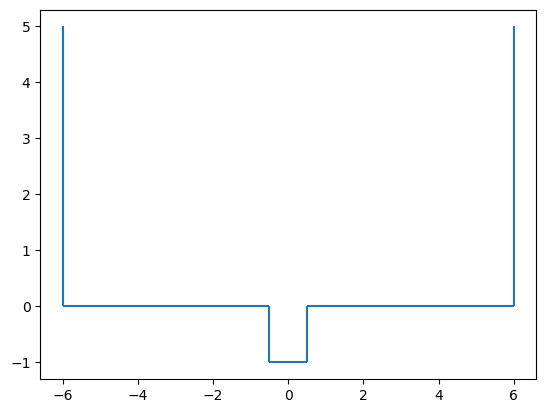

In [3]:
plt.vlines([-6,6],0,5)
plt.vlines([-0.5,0.5],0,-1)
plt.hlines(0,-6,-0.5)
plt.hlines(0,6,0.5)
plt.hlines(-1,-0.5,0.5)
plt.show()

<font size=5 color='#13DAE2'>
4. Implementación computacional y resultados
</font>
<br>


<font size=5 color='#13DAE2'>
4.1 Replicando artículo <i>Where are the particles when the box is hot?</i>
</font>
<br>

<font size=5 color='#13DAE2'>
Particle in a box
</font>
<br>

In [4]:

def Pth(n_max: int, t: float, x: np.ndarray) -> np.ndarray:
    """
    Computes the thermalized probability density for a particle in a 1D infinite potential well.

    This function calculates the probability density P_th(x, t) by summing over 
    the contributions of different energy states, weighted by the Boltzmann factor.

    Parameters:
    -----------
    n_max : int
        Maximum number of energy states to include in the summation.
    t : float
        Dimensionless temperature parameter (related to T via a scaling factor).
    x : np.ndarray
        Array of position values where the probability density is evaluated.

    Returns:
    --------
    np.ndarray
        The thermalized probability density evaluated at the given positions.
    """
    
    num = 0  # Numerator of the probability density
    den = 0  # Denominator (partition function normalization)

    for i in range(1, n_max + 1):
        # Compute the contributions of each energy level
        weight = np.exp(-i**2 / t)  # Boltzmann factor
        num += weight * (np.sin(i * x))**2  # Weighted probability contribution
        den += weight  # Accumulate partition function terms

    return (2 / np.pi) * (num / den)  # Normalized probability density

In [5]:
def nmax(func, t, tol=1e-12, args=None):
    """
    Determines the appropriate value of n_max for a given temperature t.

    This function iteratively increases the number of terms (n_max) used in the summation
    until the change in the computed probability density is below a given tolerance (tol).

    Parameters:
    -----------
    func : function
        The function that computes the thermalized probability density.
    t : float or np.ndarray
        The temperature parameter(s). If an array is provided, n_max is computed for each value.
    tol : float, optional
        Convergence tolerance for stopping the iterative search (default: 1e-12).
    args : tuple, optional
        Additional arguments to be passed to func.

    Returns:
    --------
    int or np.ndarray
        The computed n_max value for a single temperature (if t is a scalar)
        or an array of n_max values for multiple temperatures.
    """
    
    if args:
        if np.isscalar(t):  # If t is a single value
            i = 1
            s0 = func(i, t, *args)  # Compute probability density for n_max = i
            s1 = func(i + 1, t, *args)  # Compute probability density for n_max = i + 1
            delta = np.abs(s0 - s1)  # Difference between successive values

            # Increase n_max until the change is below tolerance
            while np.max(delta) > tol:
                i += 1
                s0 = func(i, t, *args)
                s1 = func(i + 1, t, *args)
                delta = np.abs(s0 - s1)
            
            return i
        
        else:  # If t is an array, compute n_max for each temperature separately
            return np.array([nmax(func, ti, tol, args) for ti in t])

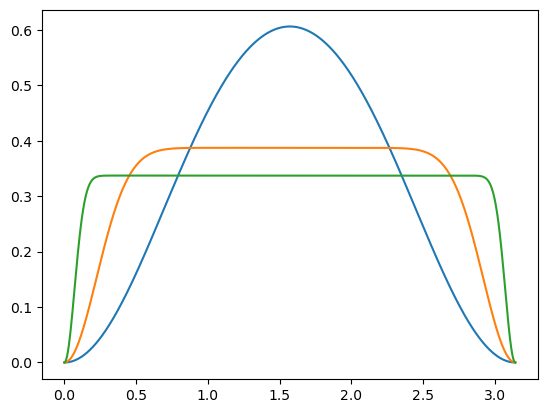

In [6]:

# Temperature values
t = np.array([1, 10, 100])

# Position values from 0 to π
xs = np.linspace(0, np.pi, 1000)

# Compute n_max for each temperature (assuming nmax is defined elsewhere)
n_max = nmax(Pth, t, args=(xs,))

# Loop through temperature values and plot the probability density
for i, j in zip(t, n_max):
    plt.plot(xs, Pth(j, i, xs))  # Compute and plot P_th for given n_max and T

plt.show() 

In [7]:
def graf1(t):
    """
    Plots the thermalized probability density for a given temperature.

    This function calculates and plots the probability density P_th(x, t)
    for a single temperature value t.

    Parameters:
    -----------
    t : float
        Temperature parameter for computing the probability density.
    """
    
    xs = np.linspace(0, np.pi, 1000)  # Define position values from 0 to π
    n_max = nmax(Pth, t, args=(xs,))  # Compute n_max for the given temperature
    plt.plot(xs, Pth(n_max, t, xs))  # Plot the probability density
    plt.xlabel("Position $x$")
    plt.ylabel("Thermalized Probability Density $P_{th}(x, T)$")
    plt.title(f"Probability Density for T = {t}")
    plt.grid()
    plt.show()

# Create an interactive slider for temperature values
slider_t = widgets.FloatLogSlider(value=10, base=10, min=-2, max=3,
                                  step=0.01, description='Temperature')

# Create the interactive plot
interactive_plot1 = interactive(graf1, t=slider_t, continuous_update=False)

# Display the interactive function
interactive_plot1

interactive(children=(FloatLogSlider(value=10.0, description='Temperature', max=3.0, min=-2.0, step=0.01), Out…

In [8]:
def bound(t):
    """
    Computes the boundary layer width for a given temperature.

    The boundary layer is defined as the position `d` where the thermalized 
    probability density P_th(d, t) drops to 0.1.

    Parameters:
    -----------
    t : float
        Temperature parameter.

    Returns:
    --------
    float
        The boundary layer width `d` where P_th(d, t) = 0.1.
    """
    
    xs = np.linspace(0, np.pi, 100)  # Define position values from 0 to π
    n_max = nmax(Pth, t, args=(xs,))  # Compute n_max for the given temperature
    
    # Define the function whose root will be found (Pth(x) - 0.1 = 0)
    func = lambda x, t, n_max: Pth(n_max, t, x) - 0.1
    
    # Find the position d where Pth(x) = 0.1 using bisection method
    d = bisect(func, 0, 1, args=(t, n_max))
    
    return d

# Vectorize the bound function to allow array input
bound = np.vectorize(bound)

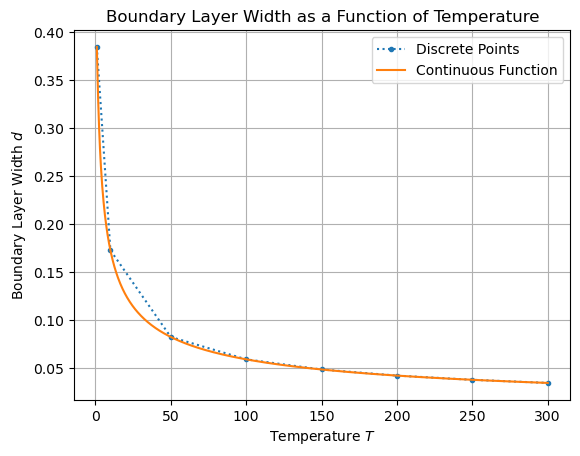

In [9]:
# Define temperature values for discrete and continuous plots
ts1 = [1, 10, 50, 100, 150, 200, 250, 300]  # Discrete temperature points
ts2 = np.linspace(1, 300, 1000)  # Continuous range of temperatures

# Plot boundary layer width for discrete temperature values
plt.plot(ts1, bound(ts1), '.:', label="Discrete Points")

# Plot boundary layer width for continuous temperature values
plt.plot(ts2, bound(ts2), label="Continuous Function")

# Add labels and title
plt.xlabel("Temperature $T$")
plt.ylabel("Boundary Layer Width $d$")
plt.title("Boundary Layer Width as a Function of Temperature")

# Add legend and grid for better readability
plt.legend()
plt.grid()

# Display the plot
plt.show()

<font size=5 color='#13DAE2'>
Two spinless particles (Probability density)
</font>
<br>

In [10]:
def P12(x1, x2, n1, n2, particle):
    """
    Computes the joint probability density for two quantum particles in a 1D box.

    The function calculates the probability density for finding one particle at `x1` 
    and the other at `x2`, given quantum numbers `n1` and `n2`. The probability 
    is different for bosons and fermions.

    Parameters:
    -----------
    x1 : float or np.ndarray
        Position of the first particle.
    x2 : float or np.ndarray
        Position of the second particle.
    n1 : int
        Quantum number of the first particle.
    n2 : int
        Quantum number of the second particle.
    particle : str
        Type of particle: either 'boson' or 'fermion'.

    Returns:
    --------
    float or np.ndarray
        The joint probability density for the given positions and quantum numbers.

    Notes:
    ------
    - For bosons, the wavefunction is symmetric under particle exchange.
    - For fermions, the wavefunction is antisymmetric, and the function enforces
      the Pauli exclusion principle by ensuring `n1 != n2`.
    """
    
    A = np.sin(n1 * x1) * np.sin(n2 * x2)
    B = np.sin(n1 * x2) * np.sin(n2 * x1)

    if particle == 'boson':
        return (2 / np.pi**2) * (A + B)**2

    elif particle == 'fermion':
        if n1 == n2:
            # Uncomment the following line to enforce Pauli's exclusion principle
            # raise ValueError("n1 and n2 must be different to respect Pauli's exclusion principle")
            pass
        else:
            return (2 / np.pi**2) * (A - B)**2

# Vectorize the function to allow array inputs
P12 = np.vectorize(P12)

In [11]:

x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

In [12]:
from mpl_toolkits.mplot3d import axes3d

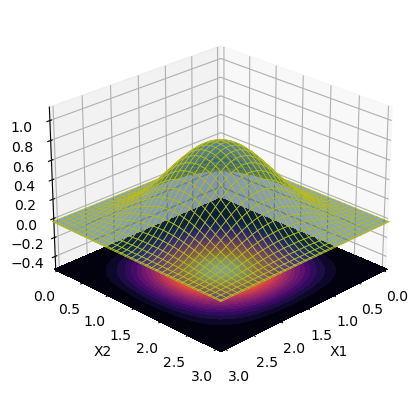

In [13]:
#@title $n_1=n_2=1$ Bosons -- P -- Figure 2 (a)

Z = P12(X1,X2,1,1,'boson')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=25, azim=45);

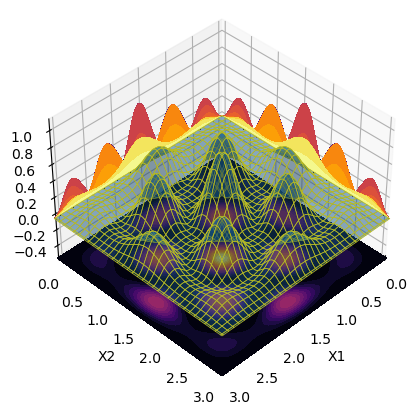

In [14]:
#@title $n_1=1, n_2=5$ Bosons -- P -- Figure 2 (b)

Z = P12(X1,X2,1,5,'boson')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=40, azim=45);

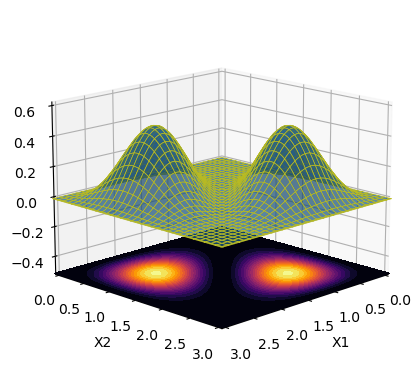

In [15]:
#@title $n_1=1, n_2=2$ Fermions -- P -- Figure 3 (a)

Z = P12(X1,X2,1,2,'fermion')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.6),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=15, azim=45);

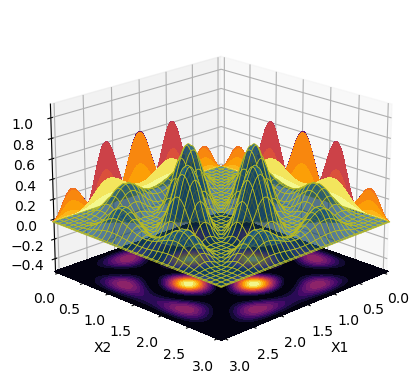

In [16]:
#@title $n_1=1, n_2=5$ Fermions -- P -- Figure 3 (b)

Z = P12(X1,X2,1,5,'fermion')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=20, azim=45);

<font size=5 color='#13DAE2'>
Two spinless particles (Thermalized probability)
</font>
<br>

In [17]:
#@title Two spinless particles -- thermalized probability

def Pth2(n_max, t, x1, x2, particle):
    """
    Calculates a thermodynamic quantity (Pth2) for a given system, which depends on the type of particle 
    (either 'fermion' or 'boson'). The function computes the ratio of two sums, where each term is weighted 
    by a Boltzmann factor involving the energy of two particles.

    Parameters:
    -----------
    n_max : int
        The maximum value for the quantum numbers n1 and n2.
    t : float
        The temperature of the system.
    x1, x2 : float
        Positions over which we evaluate
    particle : str
        The type of particle, either 'fermion' or 'boson'. This dictates the range of the summations.

    Returns:
    --------
    float
        The computed thermodynamic quantity (Pth2).
    """
    
    # Define energy function for two quantum numbers n1 and n2
    E = lambda n1, n2: n1**2 + n2**2
    num = 0  # Numerator for the ratio
    den = 0  # Denominator for the ratio

    # Case for fermions: particles obeying the Pauli exclusion principle
    if particle == 'fermion':
        for n1 in range(1, n_max):  # Quantum number n1 ranges from 1 to n_max-1
            for n2 in range(n1+1, n_max+1):  # Quantum number n2 ranges from n1+1 to n_max
                # Update the numerator and denominator based on the specific conditions for fermions
                num += P12(x1, x2, n1, n2, particle) * np.exp(-E(n1, n2) / t)
                den += np.exp(-E(n1, n2) / t)
        return num / den  # Return the ratio of the sums

    # Case for bosons: particles that do not obey the Pauli exclusion principle
    if particle == 'boson':
        for n1 in range(1, n_max+1):  # Quantum number n1 ranges from 1 to n_max
            for n2 in range(n1, n_max+1):  # Quantum number n2 ranges from n1 to n_max
                # Update the numerator and denominator based on the specific conditions for bosons
                num += P12(x1, x2, n1, n2, particle) * np.exp(-E(n1, n2) / t)
                den += np.exp(-E(n1, n2) / t)
        return num / den  # Return the ratio of the sums


In [18]:
nmax(Pth2,10,args=(xs,xs,'boson'))

16

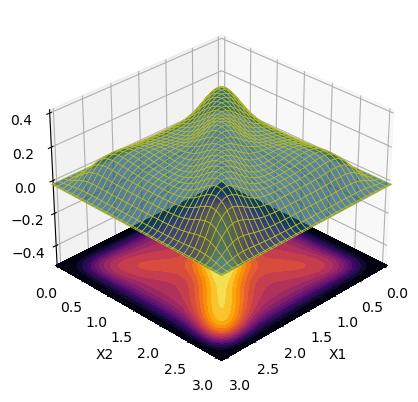

In [19]:
#@title $t=10$ Bosons -- Pht -- Figure 4 (a)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = Pth2(10,10,X1,X2,'boson')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.4),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=45);

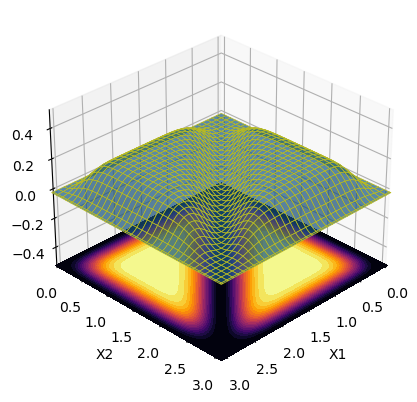

In [20]:
#@title $t=10$ Fermions -- Pht -- Figure 4 (b)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = Pth2(10,10,X1,X2,'fermion')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=3, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.5),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=45);

<font size=5 color='#13DAE2'>
Fermions with spin
</font>
<br>

In [22]:
def P12_spin(n1: int, n2: int, x1: np.ndarray, x2: np.ndarray) -> np.ndarray:
    """
    Calculates the spin-dependent interaction term between two quantum states
    described by the quantum numbers n1 and n2, based on the positions x1 and x2.

    This function computes a term involving sinusoidal functions of n1, n2, x1, and x2.
    The result depends on the difference between n1 and n2, and it respects the Pauli 
    exclusion principle by raising an exception when n1 equals n2 (although this part is currently commented out).

    Parameters:
    -----------
    n1 : int
        The quantum number of the first state.
    n2 : int
        The quantum number of the second state.
    x1 : np.ndarray
        Array of positions or another physical variable associated with the first state.
    x2 : np.ndarray
        Array of positions or another physical variable associated with the second state.

    Returns:
    --------
    np.ndarray
        The calculated interaction term between the two states, as a function of x1 and x2.
    """

    # Compute the terms A and B based on the sine functions of the quantum numbers and positions
    A = np.sin(n1 * x1) * np.sin(n2 * x2)
    B = np.sin(n1 * x2) * np.sin(n2 * x1)

    # Check if n1 equals n2 to respect the Pauli exclusion principle
    if n1 == n2:
        # The condition is commented out, but it's a safeguard for fermionic systems
        # raise ValueError("n1 and n2 must be different to respect Pauli's exclusion principle")
        pass
    else:
        # Compute the final interaction term for different n1 and n2
        return (1 / (2 * np.pi**2)) * (A + B)**2 + (3 / (2 * np.pi**2)) * (A - B)**2

# Vectorize the P12_spin function to handle element-wise operations over arrays
P12_1_2 = np.vectorize(P12_spin)

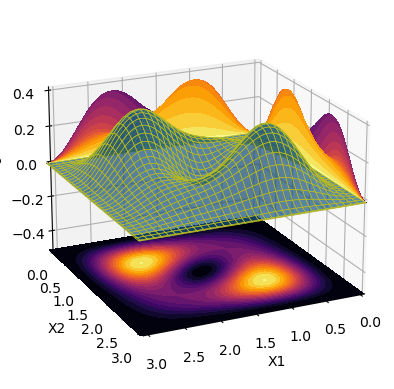

In [23]:
#@title $n_1=1,n_2=2$ Fermions -- P -- Figure 5 (a)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = P12_spin(1,2,X1,X2)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.4),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=20, azim=65);

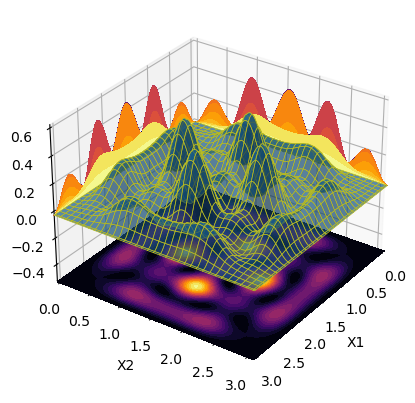

In [24]:
#@title $n_1=1,n_2=5$ Fermions -- P -- Figure 5 (b)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = P12_spin(1,5,X1,X2)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.6),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=35);

In [25]:
def Pth2_spin(n_max, t, x1, x2):
    """
    Calculates a thermodynamic quantity (Pth2_spin) involving spin-dependent interactions 
    for a system with two quantum states, considering their energy levels and temperature.

    The function computes the ratio of two sums, where each term in the sums is weighted 
    by a Boltzmann factor involving the energy of two particles. The interaction terms 
    between the quantum states are computed using the function `P12_spin`.

    Parameters:
    -----------
    n_max : int
        The maximum value for the quantum numbers n1 and n2.
    t : float
        The temperature of the system.
    x1, x2 : np.ndarray
        Arrays of positions or other physical quantities affecting the interaction.

    Returns:
    --------
    float
        The computed thermodynamic quantity (Pth2_spin), which is the ratio of the two sums.
    """
    
    # Define the energy function for two quantum numbers n1 and n2
    E = lambda n1, n2: n1**2 + n2**2
    num = 0  # Numerator for the ratio
    den = 0  # Denominator for the ratio

    # Loop over the quantum numbers n1 and n2 to calculate the sums
    for n1 in range(1, n_max):  # n1 ranges from 1 to n_max-1
        for n2 in range(n1 + 1, n_max + 1):  # n2 ranges from n1+1 to n_max
            # Update the numerator and denominator with the spin-dependent interaction terms
            num += P12_spin(n1, n2, x1, x2) * np.exp(-E(n1, n2) / t)
            den += np.exp(-E(n1, n2) / t)
    
    # Return the ratio of the sums
    return num / den

In [26]:
# verificar normalización 

Pth_func = lambda x, t, n_max: Pth(n_max,t,x)
quad(Pth_func,0,np.pi,args=(10,25))

(1.0000000000000002, 1.2917735069119558e-14)

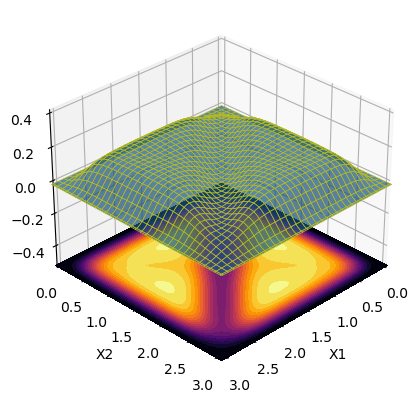

In [27]:
#@title $t=10$ Fermions -- Pht -- Figure 4 (c)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = Pth2_spin(10,10,X1,X2)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.4),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=45);

<font size=5 color='#13DAE2'>
Implementación computacional: pozo finito
</font>
<br>

In [28]:
l = 2
xi = 6

In [29]:
def coefs_even(z: float, xi: float, l: float):
    """
    Calculates the coefficients B and C for the even parity wavefunction.

    The function computes two coefficients, B and C, by integrating the respective wavefunction 
    components over specified regions. The integrals are evaluated using the `quad` function 
    from SciPy. These coefficients are used to normalize the even parity wavefunction.

    Parameters:
    -----------
    z : float
        Root of the trascendental equation
    xi : float
        A parameter related to the potential
    l : float
        The characteristic length scale (possibly related to a well or box size).

    Returns:
    --------
    B, C : float
        The normalized coefficients for the even parity wavefunction.
    """
    
    # Define the wavefunction components (psi1, psi2, psi3) as lambda functions
    psi1 = lambda x: (np.exp(2 / l * (xi**2 - z**2)**0.5 * x))**2
    psi2 = lambda x: np.cos(2 / l * z * x)**2
    psi3 = lambda x: (np.exp(-2 / l * (xi**2 - z**2)**0.5 * x))**2

    # Compute the normalization constant C2 using integrals over the relevant regions
    C2 = ((np.cos(z) * np.exp((xi**2 - z**2)**0.5))**2 * 
          (quad(psi1, -np.inf, -l / 2)[0] + quad(psi3, l / 2, np.inf)[0]) + 
          quad(psi2, -l / 2, l / 2)[0])**(-1)

    # The coefficient C is the square root of C2
    C = C2**0.5

    # Compute the coefficient B
    B = np.cos(z) * np.exp((xi**2 - z**2)**0.5) * C

    return B, C

def psi_even(y: np.ndarray, z: float, xi: float, l: float, B: float, C: float):
    """
    Computes the even parity wavefunction at a given position y.

    The wavefunction is piecewise defined:
    - For y < -l/2, it uses psi1 (a decaying exponential).
    - For -l/2 <= y <= l/2, it uses psi2 (a cosine function).
    - For y > l/2, it uses psi3 (an exponentially decaying function).

    Parameters:
    -----------
    y : np.ndarray
        The positions at which the wavefunction is evaluated.
    z : float
        The root of the trascendental equation
    xi : float
        A parameter related to the potential
    l : float
        The characteristic length scale (related to boundaries or system size).
    B : float
        The coefficient for the decaying exponential part of the wavefunction.
    C : float
        The coefficient for the cosine part of the wavefunction.

    Returns:
    --------
    float
        The value of the wavefunction at position y.
    """
    
    # Define the wavefunction components (psi1, psi2, psi3) as lambda functions
    psi1 = lambda x: np.exp(2 / l * (xi**2 - z**2)**0.5 * x)
    psi2 = lambda x: np.cos(2 / l * z * x)
    psi3 = lambda x: np.exp(-2 / l * (xi**2 - z**2)**0.5 * x)

    # Piecewise evaluation of the wavefunction based on the value of y
    if y < -l / 2:
        return B * psi1(y)
    elif (-l / 2 <= y) and (y <= l / 2):
        return C * psi2(y)
    else:
        return B * psi3(y)

# Vectorize the psi_even function to handle element-wise operations over arrays
psi_even = np.vectorize(psi_even)


In [30]:
def coefs_odd(z: float, xi: float, l: float):
    """
    Calculates the coefficients B and C for the odd parity wavefunction.

    The function computes the normalization coefficients B and C for the odd parity wavefunction 
    by integrating the respective wavefunction components over specified regions. These coefficients 
    are essential for normalizing the odd parity wavefunction.

    Parameters:
    -----------
    z : float
        The root of the trascendental equation for odd states
    xi : float
        A parameter related to the potential
    l : float
        The characteristic length, the well width

    Returns:
    --------
    B, C : float
        The normalized coefficients for the odd parity wavefunction.
    """
    
    # Define the wavefunction components (psi1, psi2, psi3) as lambda functions
    psi1 = lambda x: (np.exp(2 / l * (xi**2 - z**2)**0.5 * x))**2
    psi2 = lambda x: np.sin(2 / l * z * x)**2
    psi3 = lambda x: (-np.exp(-2 / l * (xi**2 - z**2)**0.5 * x))**2

    # Compute the normalization constant C2 using integrals over the relevant regions
    C2 = ((-np.sin(z) * np.exp((xi**2 - z**2)**0.5))**2 * 
          (quad(psi1, -np.inf, -l / 2)[0] + quad(psi3, l / 2, np.inf)[0]) + 
          quad(psi2, -l / 2, l / 2)[0])**(-1)

    # The coefficient C is the square root of C2
    C = C2**0.5

    # Compute the coefficient B
    B = -np.sin(z) * np.exp((xi**2 - z**2)**0.5) * C

    return B, C

def psi_odd(y: np.ndarray, z: float, xi: float, l: float, B: float, C: float):
    """
    Computes the odd parity wavefunction at a given position y.

    The wavefunction is piecewise defined:
    - For y < -l/2, it uses psi1 (a decaying exponential).
    - For -l/2 <= y <= l/2, it uses psi2 (a sine function).
    - For y > l/2, it uses psi3 (an exponentially decaying function).

    Parameters:
    -----------
    y : np.ndarray
        The positions at which the wavefunction is evaluated.
    z : float
        root of the trascendental equation for odd states
    xi : float
        A parameter related to the potential
    l : float
        The characteristic length of the well (related to boundaries or system size).
    B : float
        The coefficient for the decaying exponential part of the wavefunction.
    C : float
        The coefficient for the sine part of the wavefunction.

    Returns:
    --------
    float
        The value of the wavefunction at position y.
    """
    
    # Define the wavefunction components (psi1, psi2, psi3) as lambda functions
    psi1 = lambda x: np.exp(2 / l * (xi**2 - z**2)**0.5 * x)
    psi2 = lambda x: np.sin(2 / l * z * x)
    psi3 = lambda x: -np.exp(-2 / l * (xi**2 - z**2)**0.5 * x)

    # Piecewise evaluation of the wavefunction based on the value of y
    if y < -l / 2:
        return B * psi1(y)
    elif (-l / 2 <= y) and (y <= l / 2):
        return C * psi2(y)
    else:
        return B * psi3(y)

# Vectorize the psi_odd function to handle element-wise operations over arrays
psi_odd = np.vectorize(psi_odd)

In [31]:
B,C=coefs_even(3.99,xi,l)

In [32]:
B,C

(-52.83296953616821, 0.9046620737228559)

In [33]:
psi_even(0,3.99,xi,l,B,C)
P_even = lambda y,z,xi,l,B,C: psi_even(y,z,xi,l,B,C)**2
quad(P_even,-np.inf,np.inf,args=(3.99,6,l,B,C))

(0.9999999999993351, 2.3344502314831765e-09)

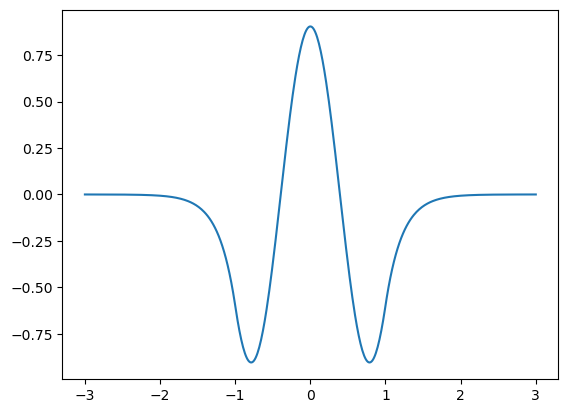

In [34]:
xs = np.linspace(-3,3,500)
plt.plot(xs,psi_even(xs,3.99,xi,l,B,C))
plt.show()

In [35]:
D,E = coefs_odd(5.23,xi,l)

In [36]:
P_odd = lambda y,z,xi,l,B,C: psi_odd(y,z,xi,l,B,C)**2
quad(P_odd,-np.inf,np.inf,args=(5.23,xi,l,D,E))

(1.0000000000001323, 1.1955872662414775e-08)

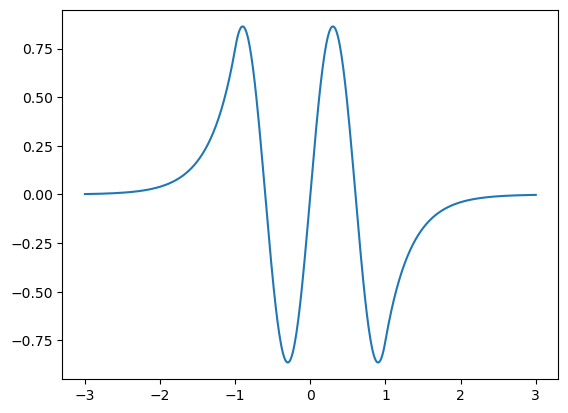

In [37]:
ys = np.linspace(-3,3,500)
plt.plot(ys,psi_odd(ys,5.23,xi,l,D,E))
plt.show()

In [38]:
def energies_even(xi: float) -> np.ndarray:
    """
    Computes the energy eigenvalues for the even parity wavefunction.

    The function solves the equation for the energy eigenvalues of the even parity wavefunction,
    where the energies are determined by finding the roots of the function that comes from
    the boundary conditions of the system.

    Parameters:
    -----------
    xi : float
        A parameter related to the potential

    Returns:
    --------
    z : np.ndarray
        The energy eigenvalues for the even parity wavefunction, found by solving the boundary condition equation.
    """
    
    # Define the equation to be solved for the even parity case
    func = lambda z: np.tan(z) - (xi**2 - z**2)**0.5 / z

    # Calculate the number of energy levels to consider (approximated by xi/pi)
    n = int(np.ceil(xi / np.pi))

    # Initialize an array to store the energy eigenvalues
    z = np.zeros(n)

    # Use Newton's method to find the roots of the equation for each energy level
    for i in range(n):
        # Starting guess is pi/4 + i * pi, ensuring solutions are spaced by pi
        z[i] = newton(func, np.pi / 4 + i * np.pi)

    return z

def energies_odd(xi: float) -> np.ndarray:
    """
    Computes the energy eigenvalues for the odd parity wavefunction.

    This function solves the equation for the energy eigenvalues of the odd parity wavefunction,
    determined by finding the roots of the function derived from the boundary conditions for the system.

    Parameters:
    -----------
    xi : float
        A parameter influencing related to the potential

    Returns:
    --------
    z : np.ndarray
        The energy eigenvalues for the odd parity wavefunction, found by solving the boundary condition equation.
    """
    
    # Define the equation to be solved for the odd parity case
    func = lambda z: 1 / np.tan(z) + (xi**2 - z**2)**0.5 / z

    # Calculate the number of energy levels to consider (approximated by xi/pi, adjusted for odd parity)
    n = int(np.ceil(xi / np.pi - 1 / 2))

    # Initialize an array to store the energy eigenvalues
    z = np.zeros(n)

    # Use Newton's method to find the roots of the equation for each energy level
    for i in range(n):
        # Starting guess is pi/4 + i * pi, ensuring solutions are spaced by pi
        z[i] = newton(func, np.pi / 4 + i * np.pi)

    return z

In [39]:
def well(y: float, xi: float, l: float) -> float:
    """
    Defines the potential well for a given position `y`.

    The potential is defined as a constant within a specific range of `y` (from -1 to 1), 
    and zero outside this range. The potential depends on the parameters `xi` and `l`.

    Parameters:
    -----------
    y : float
        The position variable 
    xi : float
        A parameter that influences the potential
    l : float
        A characteristic length scale that also influences the potential.

    Returns:
    --------
    float
        The potential at position `y`. It is -4*xi^2/l^2 within the range -1 <= y <= 1, 
        and 0 outside of this range.
    """
    
    # Return potential based on the position y
    if (-1 <= y) and (y <= 1):
        # Inside the well, return a negative constant potential
        return -4 * xi**2 / l**2
    else:
        # Outside the well, return 0 (no potential)
        return 0

# Vectorizing the well function to handle arrays of `y` efficiently
well = np.vectorize(well)

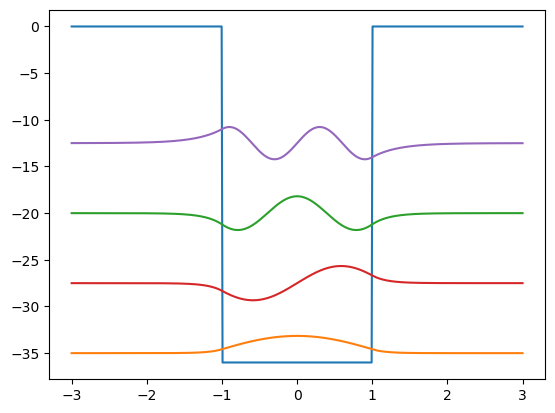

In [40]:
xi = 6
z_even = energies_even(xi)
z_odd = energies_odd(xi)

plt.plot(ys,well(xs,6,2))

for i,z in enumerate(z_even):
  B,C = coefs_even(z,xi,l)
  plt.plot(ys,2*psi_even(ys,z,xi,l,B,C)-35+15*i)

for i,z in enumerate(z_odd):
  B,C = coefs_odd(z,xi,l)
  plt.plot(ys,2*psi_odd(ys,z,xi,l,B,C)-27.5+15*i)

plt.savefig('well.png')

In [41]:
z_odd

array([2.67878311, 5.22596353])

#### Continuum states: wave packets

* $E>0$

  For the continuum states, the wavefunction will take the form of a plane wave solution, with an induced phase shift due to the potential well, thus:

$$\begin{align*}
\phi&=\begin{cases}Ae^{ipx}+Be^{-ipx}\quad\text{if }x<-\frac{\ell}{2}\\
Ce^{iqx}+De^{-iqx}\quad\text{if }-\frac{\ell}{2} <x<\frac{\ell}{2}\\
Fe^{ipx}\quad\text{if }x>\frac{\ell}{2}\end{cases}\\
&=\Theta\left(-x-\frac{\ell}{2}\right)\phi_I(x)+\Theta\left(x+\frac{\ell}{2}\right)\Theta\left(-x+\frac{\ell}{2}\right)\phi_{II}(x)+\Theta\left(x-\frac{\ell}{2}\right)\phi_{III}(x)
\end{align*}$$

  assuming the wave incident from the left, with $p=\sqrt{2mE/\hbar^2}$ and $q=\sqrt{2m(E+V_0)/\hbar^2}$. Alongside with its derivatives, this solution must satisfy the continuity condition, on both boundaries, given by the equations:

  $$
  \mathbb{M}(p,-\ell/2)\begin{bmatrix}A\\B\end{bmatrix}=\mathbb{M}(q,-\ell/2)\begin{bmatrix}C\\D\end{bmatrix}
  $$

  $$
  \mathbb{M}(q,\ell/2)\begin{bmatrix}C\\D\end{bmatrix}=\mathbb{M}(p,\ell/2)\begin{bmatrix}F\\0\end{bmatrix}
  $$

  where

  $$\mathbb{M}(k,x)=\begin{bmatrix}e^{ikx}&e^{-ikx}\\ike^{ikx}&-ike^{-ikx}\end{bmatrix}.$$

The coefficients $A,B,C,D$ can be expressed in terms of $F$ by solving for the respective vectors:

$$
\begin{bmatrix}C\\D\end{bmatrix}=\mathbb{M}^{-1}(q,\ell/2)\mathbb{M}(p,\ell/2)\begin{bmatrix}F\\0\end{bmatrix} \\
$$

$$
\begin{bmatrix}A\\B\end{bmatrix}=\mathbb{M}^{-1}(q,\ell/2)\mathbb{M}(q,-\ell/2)\mathbb{M}^{-1}(q,\ell/2)\mathbb{M}(p,\ell/2)\begin{bmatrix}F\\0\end{bmatrix}.
$$

The constant $F$ is arbitrary and it should be given by the normalization of the wavefunction; however, continuum eigenfunctions are not normalizable, and hence, cannot represent a physical state of the system, for its squared modulus cannot be interpreted as a probability density [ref. Cohen-Tannoudji]. This issue can be solved by considering the physical states of the continuum as wave packets of the form:

$$
\psi(x)=\dfrac{1}{\sqrt{2\pi}N}\int_{-\infty}^\infty g(k)\phi(x;k)\mathrm{d}k.
$$

This is possible because the continuum eigenfunctions $\phi(x;k)$ form a complete continuous basis for the state space, so the previous integral can be interpreted as an expansion in said basis with coefficients $g(k)$. Here, $N$ is a normalization factor, given by:

$$
N^2=\dfrac{1}{2\pi}\int_{-\infty}^\infty\left|\int_{-\infty}^\infty g(k)\phi(x;k)\mathrm{d}k\right|^2\mathrm{d}x.
$$

For this exercise, we have chosen $g(k)$ to be a gaussian of the form:

$$
g(k)=e^{-\frac{\Delta p^2}{4}(p-p_0)^2}
$$

In [42]:
def matrix_M(k,x):
  return np.array([[np.exp(1j*k*x),np.exp(-1j*k*x)],[1j*k*np.exp(1j*k*x),-1j*k*np.exp(-1j*k*x)]])

In [43]:
def base_wf(x,p,xi,l):
  P0 = 2*xi/l
  q = (p**2+P0**2)**0.5
  F = 1
  G = 0
  coefsIII = np.array([F,G])
  M1 = matrix_M(p,l/2)
  M2 = np.linalg.inv(matrix_M(q,l/2))
  M3 = matrix_M(q,-l/2)
  M4 = np.linalg.inv(matrix_M(p,-l/2))
  A, B = M4 @ M3 @ M2 @ M1 @ coefsIII
  C, D = M2 @ M1 @ coefsIII

  phi1 = A*np.exp(1j*p*x)+B*np.exp(-1j*p*x)
  phi2 = C*np.exp(1j*q*x)+D*np.exp(-1j*q*x)
  phi3 = F*np.exp(1j*p*x)

  theta1 = np.heaviside(-x-l/2,1)
  rect2 = np.heaviside(x+l/2,1)*np.heaviside(-x+l/2,1)
  theta3 = np.heaviside(x-l/2,1)

  return theta1*phi1 + rect2*phi2 + theta3*phi3


In [44]:
def g_coefs(p,p0=0,delta_p=1):
  return np.exp(-delta_p**2/4*(p-p0)**2)

In [45]:
ps = np.linspace(-20,20,1001)

In [46]:
quad(g_coefs,-np.inf,np.inf,args=(5,2))

(1.772453850905516, 4.24906263809807e-09)

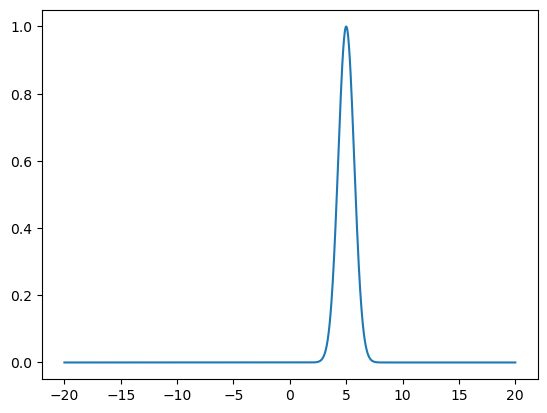

In [47]:
plt.plot(ps,g_coefs(ps,p0=5,delta_p=2))

In [48]:
def wave_packet(x,g,xi,l,**kwargs):
  func = lambda p,x_: g(p,**kwargs)*base_wf(x_,p,xi,l)
  real_func = lambda p,x_: func(p,x_).real
  imag_func = lambda p,x_: func(p,x_).imag
  psi = (2*np.pi)**0.5*(quad(real_func,0,np.inf,args=x,limit=1000)[0]+1j*quad(imag_func,0,np.inf,args=x,limit=1000)[0])
  return psi

wave_packet = np.vectorize(wave_packet)

In [49]:
(1+1j).conjugate()

(1-1j)

In [50]:
abs(wave_packet(0,g_coefs,xi,l,p0=5,delta_p=2))

3.1148161464560578

In [51]:
xs = np.linspace(-10,10,500)
ys = wave_packet(xs,g_coefs,xi,l,p0=5,delta_p=2)

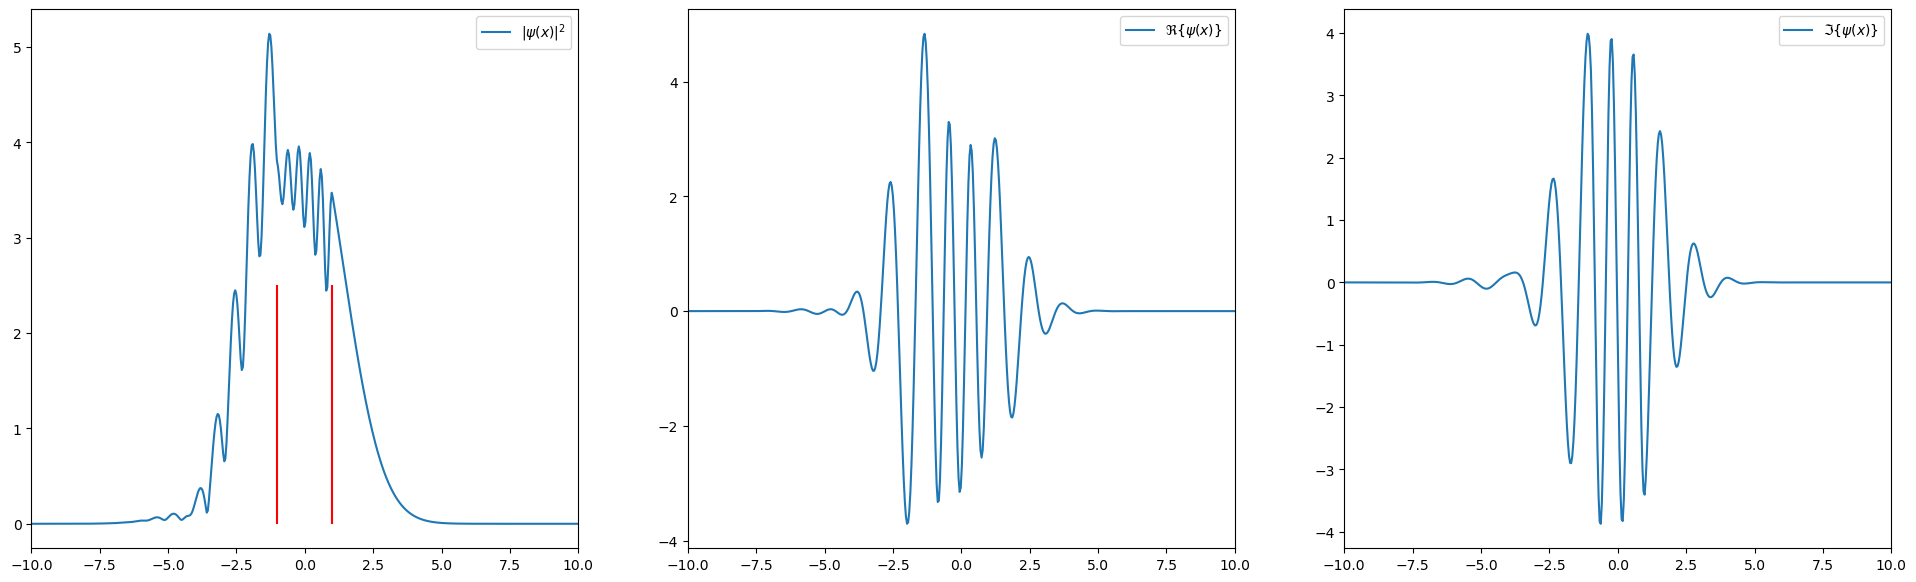

In [52]:
fig, ax = plt.subplots(1,3,figsize=(24,7))
ax[0].vlines(-1,0,2.5,'r')
ax[0].vlines(1,0,2.5,'r')
ax[0].set_xlim(-10,10)
ax[0].plot(xs,np.abs(ys),label=r'$|\psi(x)|^2$')
ax[0].legend()
ax[1].set_xlim(-10,10)
ax[1].plot(xs,ys.real,label=r'$\Re\{\psi(x)\}$')
ax[1].legend()
ax[2].plot(xs,ys.imag,label=r'$\Im\{\psi(x)\}$')
ax[2].set_xlim(-10,10)
ax[2].legend()

In [53]:
pdf = lambda x:abs(wave_packet(x,g_coefs,xi,l,p0=5,delta_p=2))

In [54]:
#N = quad(pdf,-10,10,limit=1000)
#N = N[0]**0.5

In [55]:
#ys = ys/N

In [56]:
# fig, ax = plt.subplots(1,3,figsize=(24,7))
# ax[0].vlines(-1,0,1.25,'r')
# ax[0].vlines(1,0,1.25,'r')
# ax[0].set_xlim(-10,10)
# ax[0].plot(xs,np.abs(ys),label=r'$|\psi(x)|^2$')
# ax[0].legend()
# ax[1].set_xlim(-10,10)
# ax[1].plot(xs,ys.real,label=r'$\Re\{\psi(x)\}$')
# ax[1].legend()
# ax[2].plot(xs,ys.imag,label=r'$\Im\{\psi(x)\}$')
# ax[2].set_xlim(-10,10)
# ax[2].legend()

$$E=\dfrac{\hbar^2p^2}{2m}$$

$$\begin{align}
\dfrac{2m}{\hbar^2}⟨E⟩&=\dfrac{2m}{\hbar^2}⟨\psi|\hat{H}|\psi⟩\\
&=\dfrac{2m}{\hbar^2}\int_{-\infty}^\infty\psi^*(x)\hat{H}\psi(x)\mathrm{d}x\\
&=\int_{-\infty}^\infty \psi^*(x)\left(-\dfrac{\mathrm{d}^2}{\mathrm{d}x^2}+\dfrac{2m}{\hbar^2}V(x)\right)\psi(x)~\mathrm{d}x
\end{align}$$

<font size=5 color='#13DAE2'>
Implementación computacional: Pozo grande
</font>
<br>

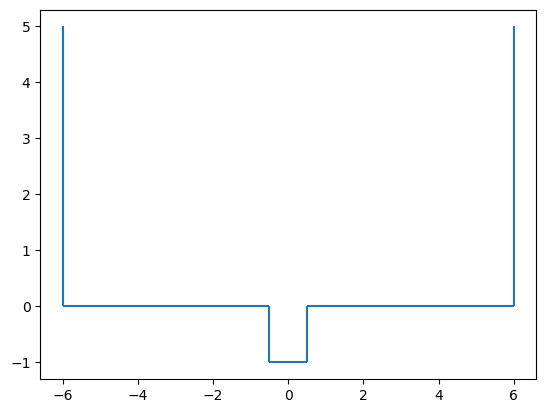

In [57]:
plt.vlines([-6,6],0,5)
plt.vlines([-0.5,0.5],0,-1)
plt.hlines(0,-6,-0.5)
plt.hlines(0,6,0.5)
plt.hlines(-1,-0.5,0.5)
plt.show()

In [58]:
def lhs_cont_even(z,xi,N):
  """
    Computes the left-hand side (LHS) of the continuity condition for even states.

    Parameters:
    z  : float or array-like, dimensionless momentum parameter (z = ℓp/2)
    xi : float, related to the potential well depth (xi = ℓ sqrt(2mV₀)/2ħ)
    N  : int, ratio of the coupled potential well widths (Nℓ is the full width)

    Returns:
    float or array-like: Value of the LHS continuity equation for even states.
    """
  num = np.tan(N*z)*np.sin(z)+np.cos(z)
  den = np.tan(N*z)*np.cos(z)-np.sin(z)

  return (z/np.tan(np.sqrt(xi**2+z**2)))*(num/den)

def lhs_cont_odd(z,xi,N):
  """
    Computes the left-hand side (LHS) of the continuity condition for odd states.

    Parameters:
    z  : float or array-like, dimensionless momentum parameter
    xi : float, related to potential well depth
    N  : int, ratio of coupled well widths

    Returns:
    float or array-like: Value of the LHS continuity equation for odd states.
    """
  num = np.tan(N*z)*np.sin(z)+np.cos(z)
  den = np.tan(N*z)*np.cos(z)-np.sin(z)

  return -(z*np.tan(np.sqrt(xi**2+z**2)))*(num/den)

def rhs_cont(z,xi):
  """
    Computes the right-hand side (RHS) of the continuity condition.

    Parameters:
    z  : float or array-like, dimensionless parameter (solution of the trascendental equation)
    xi : float, related to potential well depth

    Returns:
    float or array-like: Value of the RHS of the continuity equation.
    """
  return (xi**2+z**2)**0.5

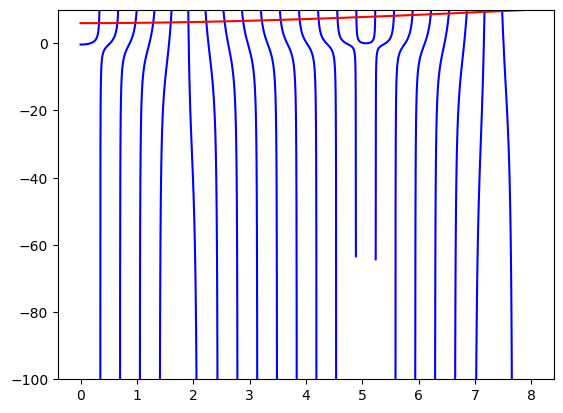

In [59]:
sup_lim = 8
N = 10
dz = 1e-3
xi = 6

# Generate asymptotic values
asym_den = [k * np.pi / (N - 1) for k in range(int(sup_lim * (N - 1) / np.pi) + 1)]
#asym_cot = [(k**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi)+1) if ((k**2*np.pi**2-xi**2)**0.5).imag==0]
asym_cot = [np.sqrt(k**2 * np.pi**2 - xi**2) for k in range(int(np.sqrt(sup_lim**2 + xi**2) / np.pi) + 1) if (k**2 * np.pi**2 >= xi**2)] # Prevent negative numbers inside sqrt

# Combine and sort asymptotic values
asym = asym_den + asym_cot
asym.sort()

# Plot LHS function between asymptotic limits
for i in range(len(asym) - 1):
    zs = np.linspace(asym[i] + dz, asym[i+1] - dz, 100)
    ys = lhs_cont_even(zs, xi, N)
    plt.plot(zs, ys, color='b')

# Set y-limits
plt.ylim(-100, 10)

# Plot RHS function
zs = np.linspace(0, sup_lim, 100)
plt.plot(zs, rhs_cont(zs, xi), 'r')

plt.show()


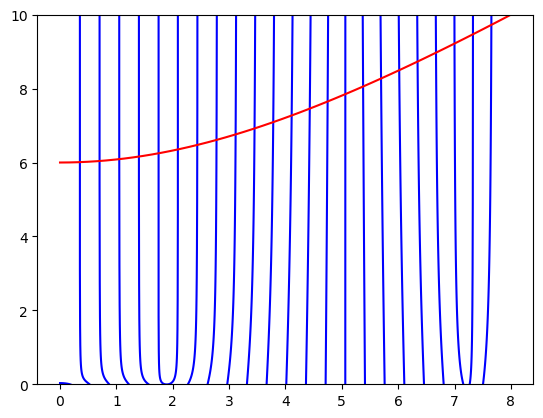

In [60]:
sup_lim = 8
N = 10
dz = 1e-5

# Compute asymptotes
asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]
asym_cot = [np.sqrt((k+1/2)**2*np.pi**2-xi**2) for k in range(int(np.sqrt(sup_lim**2+xi**2)/np.pi-1/2)+1) if ((k+0.5)**2 * np.pi**2 >= xi**2) ]


# Combine and sort asymptotes
asym = asym_den+asym_cot
asym.sort()

# Plot lhs_cont_odd function piecewise
for i in range(len(asym)-1):
  zs = np.linspace(asym[i]+dz,asym[i+1]-dz,100)
  ys = lhs_cont_odd(zs,6,N)
  plt.plot(zs,ys,color='b')
plt.ylim(0,10)

# Plot rhs_cont function
zs = np.linspace(0,sup_lim)
plt.plot(zs,rhs_cont(zs,xi),'r')

plt.show()

```
def energies_even(xi):
  func = lambda z: np.tan(z)-(xi**2-z**2)**0.5/z
  n = int(np.ceil(xi/np.pi))
  Es = np.zeros(n)
  for i in range(n):
    Es[i] = newton(func,np.pi/4+i*np.pi)
  return Es
```

In [61]:
sup_lim = 2

def energies_even_cont(xi, N, suplim):
    """
    Calculates the energy levels for a system using the continuous version of the even potential.

    This function finds the zeros of the difference between two functions (`lhs_cont_even` and `rhs_cont`), 
    which represent the left-hand side and right-hand side of a relation for the energy levels. The energy 
    levels are determined by finding the roots of the equation in the intervals defined by asymptotes.

    Parameters:
    -----------
    xi : float
        A parameter related to the physical properties of the system (likely a coupling constant).
    N : int
        A discretization parameter that affects the number of energy levels calculated.
    suplim : float
        An upper limit used to define the range over which to compute the asymptotes and solve for the energies.

    Returns:
    --------
    Es : list
        A list containing the calculated energy levels.
    z : list
        A list containing the values of `z` at which the energy levels were found.
    """
    
    # Define the function to find the root of (lhs_cont_even - rhs_cont)
    func = lambda z: lhs_cont_even(z, xi, N) - rhs_cont(z, xi)

    # Compute asymptotes for the energy levels
    # Asymptotes based on the denominator and cotangent
    asym_den = [k * np.pi / (N - 1) for k in range(int(suplim * (N - 1) / np.pi) + 1)]
    asym_cot = [np.sqrt(k**2 * np.pi**2 - xi**2)
                for k in range(int(np.sqrt(suplim**2 + xi**2) / np.pi) + 1)
                if (np.sqrt(k**2 * np.pi**2 >= xi**2))]

    # Combine and sort the asymptotes
    asym = sorted(asym_den + asym_cot)

    dz = 1e-5  # Small step for numerical precision
    Es = []  # List to store energy values
    z = []   # List to store corresponding z values

    # Loop through each interval defined by asymptotes
    for i in range(len(asym) - 1):
        # Check if the function changes sign in the interval
        if func(asym[i] + dz) * func(asym[i + 1] - dz) > 0:
            aux = np.linspace(asym[i] + dz, asym[i + 1] - dz, 100)
            # If the function does not change sign, skip to the next interval
            if all(val > 0 for val in func(aux)) or all(val < 0 for val in func(aux)):
                continue
            else:
                # If the function changes sign, use Ridder's method to find the roots
                b = (asym[i] + asym[i + 1]) / 2
                try:
                    z1 = ridder(func, asym[i] + dz, b, maxiter=1000)
                    z2 = ridder(func, b, asym[i + 1] - dz, maxiter=1000)
                    E1 = 0.5*z1**2  # Calculate energy for z1
                    E2 = 0.5*z2**2  # Calculate energy for z2
                    
                    z.append(z1)
                    z.append(z2)
                    Es.append(E1)
                    Es.append(E2)
                except ValueError:
                    continue  # Skip if Ridder's method fails to converge
        else:
            # If the function does not change sign, find a single root in the interval
            try:
                z3 = ridder(func, asym[i] + dz, asym[i + 1] - dz, maxiter=1000)
                E = 0.5*z3**2  # Calculate energy for z3
                z.append(z3)
                Es.append(E)
            except ValueError:
                continue  # Skip if Ridder's method fails to converge

    return Es, z

In [62]:
def energies_odd_cont(xi, N, sup_lim):
    """
    Computes the energy levels for the odd-parity case in a given system.

    Parameters:
    xi (float): A parameter related to the system.
    N (int): Number of states.
    sup_lim (float): Upper limit for evaluation.

    Returns:
    list: Computed energy levels.
    """

    # Define the function whose roots correspond to energy levels
    func = lambda z: lhs_cont_odd(z, xi, N) - rhs_cont(z, xi)

    # Compute asymptotic values from denominator conditions
    asym_den = [k * np.pi / (N - 1) for k in range(int(sup_lim * (N - 1) / np.pi) + 1)]

    # Compute asymptotic values from cotangent conditions
    asym_cot = [np.sqrt((k + 1/2)**2 * np.pi**2 - xi**2) 
                for k in range(int(np.sqrt(sup_lim**2 + xi**2) / np.pi) + 1) 
                if ((k + 1/2)**2 * np.pi**2 - xi**2) >= 0]  # Avoid complex values

    # Combine and sort asymptotic values
    asym = asym_den + asym_cot
    asym.sort()

    dz = 1e-5  # Small offset to avoid singularities
    Es = []  # List to store energy levels
    z = []

    # Find energy levels by locating roots of the function
    for i in range(len(asym) - 1):
        if func(asym[i] + dz) * func(asym[i + 1] - dz) > 0:
            # If there is no sign change in the interval, check if the function stays positive or negative
            aux = np.linspace(asym[i] + dz, asym[i + 1] - dz, 100)
            if all(val > 0 for val in func(aux)) or all(val < 0 for val in func(aux)):
                continue  # Skip the interval if no sign change occurs
            else:
                # If the function changes sign, use Ridder's method to find two roots
                b = (asym[i] + asym[i + 1]) / 2
                z1 = ridder(func, asym[i] + dz, b, maxiter=1000)
                z2 = ridder(func, b, asym[i + 1] - dz)
                
                E1 = 0.5*z1**2
                E2 = 0.5*z2**2
                
                z.append(z1)
                z.append(z2)
                Es.append(E1)
                Es.append(E2)
        else:
            # If there is a sign change, find a single root using Ridder's method
            z3 = ridder(func, asym[i] + dz, asym[i + 1] - dz, maxiter=1000)
            E = 0.5*z3**2
            z.append(z3)
            Es.append(E)
            Es.append(E)

    return Es, z

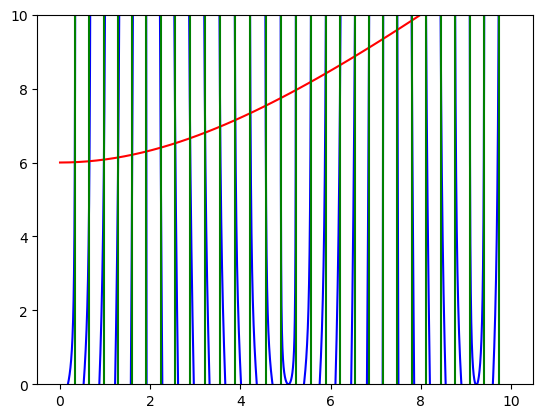

In [63]:
# Define parameters
sup_lim = 10  # Upper limit for evaluation
N = 10        
dz = 1e-3     # Small offset to avoid singularities

# Compute the asymptotes for the function
# Asymptotes that depend on k*pi/(N-1)
asym_den = [k * np.pi / (N - 1) for k in range(int(sup_lim * (N - 1) / np.pi) + 1)]

# Asymptotes that depend on the square root of (k^2 * pi^2 - xi^2)
asym_cot = [np.sqrt(k**2 * np.pi**2 - xi**2) 
            for k in range(int(np.sqrt(sup_lim**2 + xi**2) / np.pi) + 1) 
            if (k**2 * np.pi**2) >= xi**2]  # Avoid complex values

# Combine and sort the asymptotes
asym = asym_den + asym_cot
asym.sort()

# Plot lhs_cont_even function over the intervals defined by asymptotes
for i in range(len(asym) - 1):
    zs = np.linspace(asym[i] + dz, asym[i + 1] - dz, 1000)  # Points in the interval
    ys = lhs_cont_even(zs, xi, N)  # Evaluate the function at these points
    plt.plot(zs, ys, color='b')  # Plot in blue

plt.ylim(0, 10)  # Limit the y-axis

# Compute energy values using the function energies_even_cont
Es_even,z_even = energies_even_cont(xi, N, sup_lim)

# Plot rhs_cont function in red
zs = np.linspace(0, sup_lim)
plt.plot(zs, rhs_cont(zs, xi), 'r')

# Plot vertical lines at the computed energy values (green)
plt.vlines(z_even, 0, 10, 'g')


plt.show()

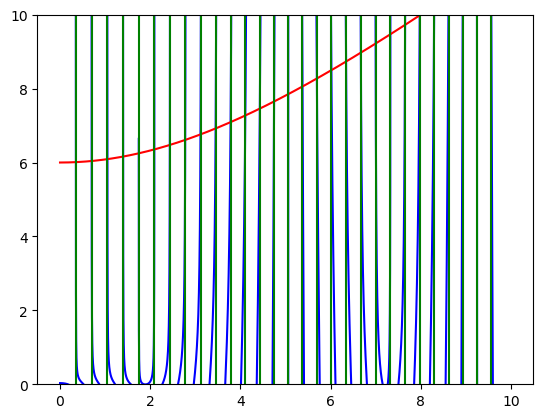

In [64]:
# Parameters 
sup_lim = 10  # Upper limit for asymptotes
N = 10  # Number of points
dz = 1e-3  # Small step for numerical differentiation

# Asymptote calculation for even potential
# Calculate the denumerator part for asymptotes
asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]

# Calculate the cotangent asymptotes where the expression inside the square root is non-negative
asym_cot = [((k+1/2)**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi)+1) 
            if (((k+1/2)**2*np.pi**2-xi**2)**0.5).imag == 0]

# Combine both types of asymptotes and sort them
asym = asym_den + asym_cot
asym.sort()

# Plotting the left-hand side (lhs_cont_odd) between asymptotes
# For each pair of consecutive asymptotes, calculate the lhs_cont_odd function
for i in range(len(asym)-1):
    # Create a range of z values between the current and next asymptote with small steps
    zs = np.linspace(asym[i] + dz, asym[i + 1] - dz, 1000)
    # Calculate the lhs_cont_odd function values at these z values
    ys = lhs_cont_odd(zs, xi, N)
    # Plot the result in blue
    plt.plot(zs, ys, color='b')

# Set y-axis limits for the plot (from 0 to 10)
plt.ylim(0, 10)

# Calculate energy levels and the corresponding z values using energies_odd_cont
Es_odd, z_odd = energies_odd_cont(xi, N, sup_lim)

# Plot the right-hand side (rhs_cont) in red
zs = np.linspace(0, sup_lim, 1000)
plt.plot(zs, rhs_cont(zs, xi), 'r')

# Plot vertical lines at the energy levels (z values) calculated before
plt.vlines(z_odd, 0, 10, 'g')


plt.show()
#plt.xlim(0,2)

In [65]:
energies = Es_even + Es_odd
energies.sort()
energies

[0.05372161794825725,
 0.06155889602196703,
 0.06155889602196703,
 0.21333954056303983,
 0.24592454650184953,
 0.24592454650184953,
 0.4744681855200816,
 0.5522159420733096,
 0.5522159420733096,
 0.8315691244164848,
 0.9791056037513861,
 0.9791056037513861,
 1.28247255890432,
 1.5249415446775334,
 1.8325452327566665,
 2.1878018620415864,
 2.4916511746848533,
 2.965446508232752,
 2.965446508232752,
 3.2672546249397327,
 3.8551529404580704,
 3.8551529404580704,
 4.16222870253427,
 4.85342992146522,
 4.85342992146522,
 5.17653635849747,
 5.955623172022451,
 5.955623172022451,
 6.308914357559131,
 7.155533461455791,
 7.155533461455791,
 7.557618555863256,
 8.445521118394053,
 8.445521118394053,
 8.92060052092875,
 9.81826273249947,
 9.81826273249947,
 10.395435101923649,
 11.271366938828255,
 11.271366938828255,
 11.979126620652506,
 12.812496680691183,
 12.812496680691183,
 13.667832463570765,
 14.457566912257718,
 14.457566912257718,
 15.456540651065456,
 16.221009702893245,
 16.22100970

In [66]:
np.array(energies[1:])-np.array(energies[:-1])

array([0.00783728, 0.        , 0.15178064, 0.03258501, 0.        ,
       0.22854364, 0.07774776, 0.        , 0.27935318, 0.14753648,
       0.        , 0.30336696, 0.24246899, 0.30760369, 0.35525663,
       0.30384931, 0.47379533, 0.        , 0.30180812, 0.58789832,
       0.        , 0.30707576, 0.69120122, 0.        , 0.32310644,
       0.77908681, 0.        , 0.35329119, 0.8466191 , 0.        ,
       0.40208509, 0.88790256, 0.        , 0.4750794 , 0.89766221,
       0.        , 0.57717237, 0.87593184, 0.        , 0.70775968,
       0.83337006, 0.        , 0.85533578, 0.78973445, 0.        ,
       0.99897374, 0.76446905, 0.        , 1.11782706, 0.770091  ,
       0.        , 1.19824236, 0.81295866, 0.        , 1.23434651,
       0.89530816, 0.        , 1.22818097, 1.01370907, 1.19197201,
       1.15521983, 1.14744986, 1.29738652, 0.        , 1.11848465,
       1.41569388, 0.        , 1.12284679, 1.49264309, 0.        ,
       1.16942707, 1.52211304, 0.        , 1.25853879, 1.51037

In [67]:
# Function to calculate coefficients B and C for the even potential case
def coefs_even_cont(z: float, xi: float, l: float, N: int):
  # Define the first wave function (psi1) as a lambda function
  psi1 = lambda x: (np.tan(N*z)*np.cos(2/l*z*x) + np.sin(2/l*z*x))**2
  
  # Define the second wave function (psi2) as a lambda function
  psi2 = lambda x: np.cos(2/l*(xi**2 + z**2)**0.5 * x)**2
  
  # Define the third wave function (psi3) as a lambda function
  psi3 = lambda x: (np.tan(N*z)*np.cos(2/l*z*x) - np.sin(2/l*z*x))**2

  # Calculate a factor used in the calculation of B and C
  factor = (np.tan(N*z)*np.cos(z) - np.sin(z)) / np.cos((xi**2 + z**2)**0.5)

  # Perform numerical integration over different ranges for psi1, psi3, and psi2
  # These integrals contribute to the calculation of the coefficient B
  B2 = (quad(psi1, -N*l/2, -l/2)[0] + quad(psi3, l/2, N*l/2)[0] + 
        factor**2 * quad(psi2, -l/2, l/2)[0])**(-1)

  # Calculate B, the normalization coefficient
  B = B2**0.5

  # Calculate C using the previously calculated factor
  C = B * factor

  # Return the coefficients B and C
  return B, C

# Function to calculate the wave function (psi) for the even potential case
def psi_even_cont(y: np.ndarray, z: float, xi: float, l: float, B: float, C: float, N: int):
  # Define the first wave function (psi1) as a lambda function
  psi1 = lambda x: np.tan(N*z)*np.cos(2/l*z*x) + np.sin(2/l*z*x)
  
  # Define the second wave function (psi2) as a lambda function
  psi2 = lambda x: np.cos(2/l*(xi**2 + z**2)**0.5 * x)
  
  # Define the third wave function (psi3) as a lambda function
  psi3 = lambda x: np.tan(N*z)*np.cos(2/l*z*x) - np.sin(2/l*z*x)

  # Depending on the value of y, return the corresponding wave function:
  # - For y in the range (-N*l/2, -l/2), use the first wave function (psi1)
  # - For y in the range (-l/2, l/2), use the second wave function (psi2)
  # - For y in the range (l/2, N*l/2), use the third wave function (psi3)
  # - If y is outside these ranges, return zero
  if (-N*l/2 <= y) and (y < -l/2):
    return B * psi1(y)
  elif (-l/2 <= y) and (y <= l/2):
    return C * psi2(y)
  elif (l/2 < y) and (y <= N*l/2):
    return B * psi3(y)
  else:
    return y * 0  # Return zero for values of y outside the considered range

# Vectorize the psi_even_cont function to work on numpy arrays
psi_even_cont = np.vectorize(psi_even_cont)


In [68]:
B,C = coefs_even_cont(z_even[-1],xi,l,N)
int_dummy = 5
xs = np.linspace(-N*l/2-int_dummy,N*l/2+int_dummy,1000)
ys = psi_even_cont(xs,z_even[-1],xi,l,B,C,N)


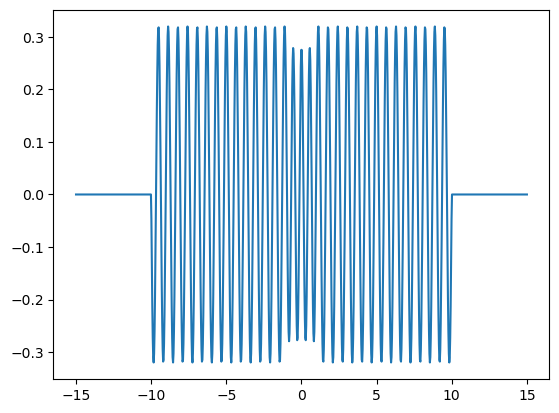

In [69]:
plt.plot(xs,ys)

In [70]:
norm = lambda y,z,xi,l,B,C,N: psi_even_cont(y,z,xi,l,B,C,N)**2

In [71]:
quad(norm,-N*l/2,N*l/2,args=(z_even[1],xi,l,B,C,N))

(1.1104185155890212, 2.7984348172083173e-09)

In [72]:
# Function to calculate coefficients B and C for the odd potential case
def coefs_odd_cont(z: float, xi: float, l: float, N: int):
  # Define the first wave function (psi1) as a lambda function
  psi1 = lambda x: (np.tan(N*z)*np.cos(2/l*z*x) + np.sin(2/l*z*x))**2
  
  # Define the second wave function (psi2) as a lambda function
  psi2 = lambda x: np.sin(2/l*(xi**2 + z**2)**0.5 * x)**2
  
  # Define the third wave function (psi3) as a lambda function
  psi3 = lambda x: (-np.tan(N*z)*np.cos(2/l*z*x) + np.sin(2/l*z*x))**2

  # Calculate a factor used in the calculation of B and C
  factor = (-np.tan(N*z)*np.cos(z) + np.sin(z)) / np.sin((xi**2 + z**2)**0.5)

  # Perform numerical integration over different ranges for psi1, psi3, and psi2
  # These integrals contribute to the calculation of the coefficient B
  B2 = (quad(psi1, -N*l/2, -l/2)[0] + quad(psi3, l/2, N*l/2)[0] + 
        factor**2 * quad(psi2, -l/2, l/2)[0])**(-1)

  # Calculate B, the normalization coefficient
  B = B2**0.5

  # Calculate C using the previously calculated factor
  C = B * factor

  # Return the coefficients B and C
  return B, C

# Function to calculate the wave function (psi) for the odd potential case
def psi_odd_cont(y: np.ndarray, z: float, xi: float, l: float, B: float, C: float, N: int):
  # Define the first wave function (psi1) as a lambda function
  psi1 = lambda x: np.tan(N*z)*np.cos(2/l*z*x) + np.sin(2/l*z*x)
  
  # Define the second wave function (psi2) as a lambda function
  psi2 = lambda x: np.sin(2/l*(xi**2 + z**2)**0.5 * x)
  
  # Define the third wave function (psi3) as a lambda function
  psi3 = lambda x: -np.tan(N*z)*np.cos(2/l*z*x) + np.sin(2/l*z*x)

  # Depending on the value of y, return the corresponding wave function:
  # - For y in the range (-N*l/2, -l/2), use the first wave function (psi1)
  # - For y in the range (-l/2, l/2), use the second wave function (psi2)
  # - For y in the range (l/2, N*l/2), use the third wave function (psi3)
  # - If y is outside these ranges, return zero
  if (-N*l/2 <= y) and (y < -l/2):
    return B * psi1(y)
  elif (-l/2 <= y) and (y <= l/2):
    return C * psi2(y)
  elif (l/2 < y) and (y <= N*l/2):
    return B * psi3(y)
  else:
    return y * 0  # Return zero for values of y outside the considered range

# Vectorize the psi_odd_cont function to work on numpy arrays
psi_odd_cont = np.vectorize(psi_odd_cont)


In [73]:
B,C = coefs_odd_cont(z_odd[-1],xi,l,N)
int_dummy = 5
xs = np.linspace(-N*l/2-int_dummy,N*l/2+int_dummy,1000)
ys = psi_odd_cont(xs,z_odd[-1],xi,l,B,C,N)


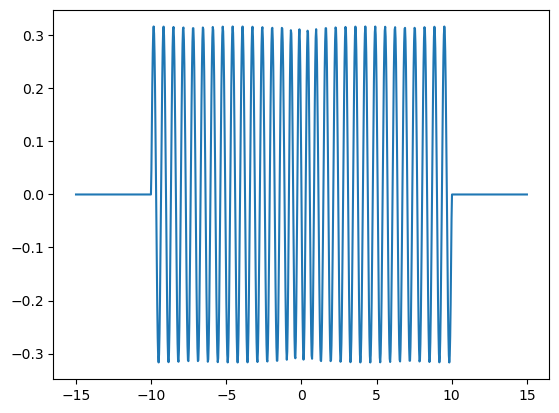

In [74]:
plt.plot(xs,ys)

<font size=5 color='#13DAE2'>
Probabilidad térmica
</font>
<br>

$$\mathbb{P}_n(x,t)=\dfrac{\displaystyle\sum_{\text{discrete}}\psi_n^2(x)e^{-\frac{E_n}{kT}}+\displaystyle\sum_{\text{continuous}}\psi_n^2(x)e^{-\frac{E_n}{kT}}}{\displaystyle\sum_{\text{discrete}}e^{-\frac{E_n}{kT}}+\displaystyle\sum_{\text{continuous}}e^{-\frac{E_n}{kT}}}$$

Estados continuos: $$\dfrac{\Delta E}{kT}\ll 1$$

Resolvemos un problema de mecánica cuántica en un pozo de potencial definido a trozos, donde las soluciones se dividen en funciones de onda pares e impares. Las funciones calculan los valores propios de energía y las correspondientes funciones de onda.

## Funciones Principales y Sus Roles

### 1. Cálculo de Energía

- **`energies_even_cont(xi, N, sup_lim)`**: Calcula los valores propios de energía permitidos para las funciones de onda pares, encontrando los ceros de una ecuación trascendental.
- **`energies_odd_cont(xi, N, sup_lim)`**: Calcula los valores propios de energía permitidos para las funciones de onda impares, encontrando los ceros de una ecuación trascendental.

### 2. Coeficientes de la Función de Onda

- **`coefs_even_cont(z, xi, l, N)`**: Calcula los coeficientes $B$ y $C$ para las funciones de onda pares utilizando integración numérica.
- **`coefs_odd_cont(z, xi, l, N)`**: Calcula los coeficientes para las funciones de onda impares utilizando integración numérica.

### 3. Funciones de Onda

- **`psi_even_cont(y, z, xi, l, B, C, N)`**: Devuelve el valor de la función de onda par en la posición $y$.
- **`psi_odd_cont(y, z, xi, l, B, C, N)`**: Devuelve el valor de la función de onda impar en la posición $y$.

### 4. Graficación y Normalización

El código genera las funciones propias para el estado de energía más alto calculado.  
La normalización se verifica utilizando integración numérica con `quad`.



Para los estados continuos debemos asegurarnos que el espacio entre los niveles de energía son mucho más pequeñso qeu la energía térmica.

In [77]:
def thermal_probability(x: np.ndarray, xi: float, l: float, N: int, t: float) -> np.ndarray:
    """
    Computes the thermal probability distribution P_n(x, T) with dynamic truncation for continuous states.
    
    Parameters:
    - x: np.ndarray -> Position values.
    - xi: float -> Adimentional variable related to the potential 
    - l: float -> width of the finite potential well
    - t: float -> Adimentional varible to take into account the temperature
    
    Returns:
    - P_n(x, T): np.ndarray -> Thermal probability distribution at x.
    """
    # Compute sums for discrete
    
    # Energies 
    z_dis_even = energies_even(xi)
    z_dis_odd = energies_odd(xi)
    
    # sum for Wavefunctions and partition function
    sum_dis_even = 0
    partition_dis_even = 0
    for z in z_dis_even:
        B,C = coefs_even(z,xi,l)
        sum_dis_even += ( psi_even(x,z,xi,l,B,C)**2 * np.exp( -(xi**2 - z**2)/t) )
        partition_dis_even += np.exp(-(xi**2 - z**2) / t)
        
    sum_dis_odd = 0
    partition_dis_odd = 0
    for z in z_dis_odd:
        B,C = coefs_odd(z,xi,l)
        sum_dis_odd += ( psi_odd(x,z,xi,l,B,C )**2 * np.exp( -(xi**2 - z**2) / t) )
        partition_dis_odd += np.exp(-(xi**2 - z**2) / t)
    
    P = (sum_dis_even + sum_dis_odd) / (partition_dis_even + partition_dis_odd)
    # ------------------------------------------------------------------------
    # Compute sum for continuum states
    
    # Energies
    Es_cont_even, z_cont_even = energies_even_cont(xi,N,10)
    Es_cont_odd, z_cont_odd = energies_odd_cont(xi,N,10)
    
    # Sum of wavefunctions and partition functions
    
    sum_cont_even = 0
    partition_cont_even = 0
    for z in z_cont_even:
        B,C = coefs_even_cont(z,xi,l,N)
        sum_cont_even += ( psi_even_cont(x,z,xi,l,B,C,N)**2 * np.exp( -z**2/ t ) )
        partition_cont_even += np.exp(-z**2 / t)
        
    sum_cont_odd = 0
    partition_cont_odd = 0
    for z in z_cont_odd:
        B,C = coefs_odd_cont(z,xi,l,N)
        sum_cont_odd += ( psi_odd_cont(x,z,xi,l,B,C,N)**2 * np.exp( -z**2 / t) )
        partition_cont_odd += np.exp(-z**2 / t)
        
    #--------------------------------------------------------------------------------------------
    
    # Compute the total
    num = sum_dis_even + sum_dis_odd + sum_cont_even + sum_cont_odd 
    den = partition_dis_even + partition_dis_odd + partition_cont_even + partition_cont_odd 
    #P =  num / den
    
    return P


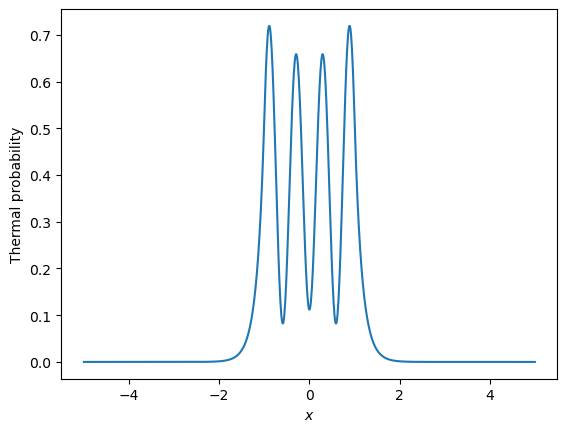

In [109]:
# Define parameters
N = 5
xi = 6
l = 2
kT = 6
x = np.linspace(-5,5,1000)

# PLot thermal probability for fized parameters
plt.plot(x,thermal_probability(x,xi,l,N,kT))
plt.ylabel("Thermal probability")
plt.xlabel(r"$x$")
plt.show()

Figure 1

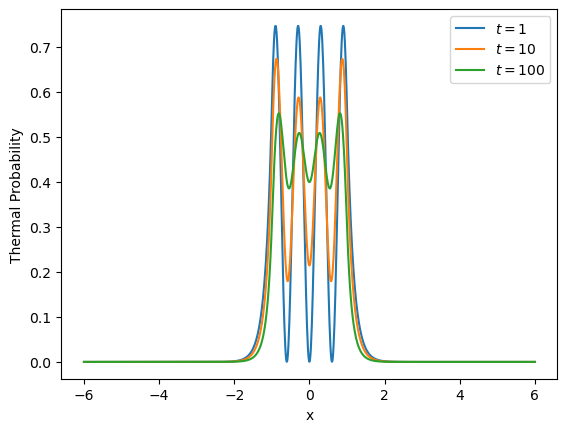

In [110]:
# Possible temperatures to be considered
t = np.array([1,10,100])
xs = np.linspace(-6,6,1000)

for i in t:
  plt.plot(xs,thermal_probability(xs,xi,l,N,i), label= r"$t = %.f $"%i)

plt.legend()
plt.xlabel("x")
plt.ylabel("Thermal Probability")
plt.show()

In [111]:

def boundM(t):
    """
    This function calculates the roots for thermal_probability - 0.1 on a desired interval
    
    args:
    t: -> float Adimentional temperature of the reservoir
    
    returns:
    d: -> float Root on the interval
    """
    xs = np.linspace(-5,5,100)
    func = lambda x,xi,l,N,t: thermal_probability(x,xi,l,N,t) - 0.1
    d = bisect(func,-2,-1,args=(xi,l,N,t))
    return d 

boundM = np.vectorize(boundM)

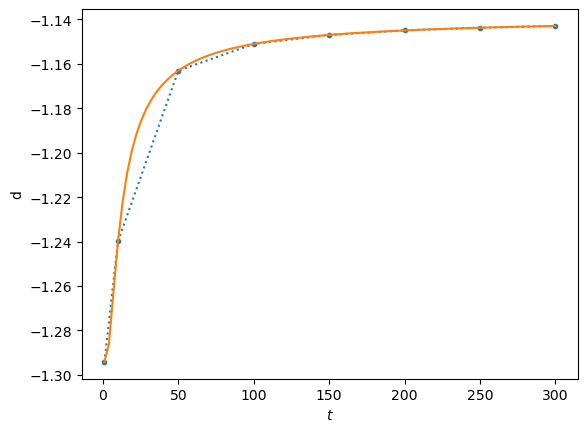

In [112]:
ts1 = [1,10,50,100,150,200,250,300]
ts2 = np.linspace(1,300,100)

plt.plot(ts1,boundM(ts1),'.:')
plt.plot(ts2,boundM(ts2))

plt.xlabel(r"$t$")
plt.ylabel(r"d")
plt.show()

<font size=5 color='#13DAE2'>
Two spinless particles
</font>
<br>

In [113]:
# Function to calculate the wavefunction for a single particle in discrete space
def one_particle_psi_dis(x, xi, l, N, z, parity):
    """
    Calculates the wavefunction for a single particle in discrete space, 
    given the specified parameters. The wavefunction can be either even 
    or odd depending on the parity argument.

    Parameters:
    x (float or np.ndarray): The position(s) where the wavefunction is evaluated.
    xi (float): A parameter related to ths potential
    l (float): A length scale.
    N (int): the big well has a size of N*L
    z (float): Root of the trascendental equation related to the energy
    parity (str): The parity of the wavefunction, either "even" or "odd".

    Returns:
    float or np.ndarray: The calculated wavefunction at the specified position(s).
    """
    
    if parity == "even":
        # Even wavefunction
        B, C = coefs_even(z, xi, l)
        psi = psi_even(x, z, xi, l, B, C)
    
    else:
        # Odd wavefunction
        B, C = coefs_odd(z, xi, l)
        psi = psi_odd(x, z, xi, l, B, C)
    
    return psi

def one_particle_psi_cont(x, xi, l, N, z, parity):
    """
    Calculates the wavefunction for a single particle in continuous space, 
    given the specified parameters. The wavefunction can be either even 
    or odd depending on the parity argument.

    Parameters:
    x (float or np.ndarray): The position(s) where the wavefunction is evaluated.
    xi (float): A parameter related to the potential
    l (float): A length scale.
    N (int): the big well has a size of N*L
    z (float):  Root of the trascendental equation related to the energy
    parity (str): The parity of the wavefunction, either "even" or "odd".

    Returns:
    float or np.ndarray: The calculated wavefunction at the specified position(s).
    """
    
    if parity == "even":
        # Even wavefunction
        B, C = coefs_even_cont(z, xi, l, N)
        psi = psi_even_cont(x, z, xi, l, B, C, N)
    
    else:
        # Odd wavefunction
        B, C = coefs_odd_cont(z, xi, l, N)
        psi = psi_odd_cont(x, z, xi, l, B, C, N)
    
    return psi

# Vectorize the one_particle_psi_dis function to apply it to numpy arrays
one_particle_psi_dis = np.vectorize(one_particle_psi_dis)

# Vectorize the one_particle_psi_cont function to apply it to numpy arrays
one_particle_psi_cont = np.vectorize(one_particle_psi_cont)

In [114]:
from scipy.integrate import dblquad

In [129]:
def P12M(x1: np.ndarray, x2: np.ndarray,
         z1: float, z2: float,
         xi: float, l: float,
         N: int, particle: str,
         psi1: str, psi2: str,
         parity1, parity2):
    """
    Computes the probability density for two particles in a system, given their positions and wavefunctions. 
    The function calculates the product of two single-particle wavefunctions (either discrete or continuous) 
    based on the particle type (boson or fermion) and applies symmetry or antisymmetry conditions accordingly.
    
    Parameters:
    x1 (np.ndarray): The position(s) of the first particle.
    x2 (np.ndarray): The position(s) of the second particle.
    z1 (float): related to the energy of the first particle
    z2 (float): Related to the energy of the second particle.
    xi (float): A parameter related to the particle's characteristics.
    l (float): width of the finite potential well
    N (int): the big well size is N*L
    particle (str): Type of particle, either 'boson' or 'fermion'.
    psi1 (str): Type of wavefunction for the first particle ('discrete' or 'continuum').
    psi2 (str): Type of wavefunction for the second particle ('discrete' or 'continuum').
    parity1: Parity condition for the first particle's wavefunction.
    parity2: Parity condition for the second particle's wavefunction.
    
    Returns:
    np.ndarray: The calculated probability density for the two-particle system.
    """
    
    # Consider all four possible scenarios based on wavefunction types (discrete or continuum)
    if psi1 == "discrete" and psi2 == "discrete":
        # Both wavefunctions are discrete
        A = one_particle_psi_dis(x1, xi, l, N, z1, parity1) * one_particle_psi_dis(x2, xi, l, N, z2, parity2)
        B = one_particle_psi_dis(x2, xi, l, N, z1, parity1) * one_particle_psi_dis(x1, xi, l, N, z2, parity2)

    elif psi1 == "continuum" and psi2 == "continuum":
        # Both wavefunctions are continuous
        A = one_particle_psi_cont(x1, xi, l, N, z1, parity1) * one_particle_psi_cont(x2, xi, l, N, z2, parity2)
        B = one_particle_psi_cont(x2, xi, l, N, z1, parity1) * one_particle_psi_cont(x1, xi, l, N, z2, parity2)

    else:  # Mixed case: one discrete, one continuum
        # One wavefunction is discrete and the other is continuous
        A = one_particle_psi_dis(x1, xi, l, N, z1, parity1) * one_particle_psi_cont(x2, xi, l, N, z2, parity2)
        B = one_particle_psi_dis(x2, xi, l, N, z1, parity1) * one_particle_psi_cont(x1, xi, l, N, z2, parity2)

    # Apply symmetry or antisymmetry for the probability, based on particle type
    if particle == 'boson':
        if z1 == z2:
            C = 0.25
        else:
            C = 0.5
        # Bosonic particles (symmetric wavefunction)
        P = C*(A + B) ** 2
    elif particle == 'fermion':
        # Fermionic particles (antisymmetric wavefunction, Pauli exclusion principle)
        if z1 == z2:  # If the particles are at the same position, exclude them based on Pauli's principle
            return 0
        else:
            P = 0.5*(A - B) ** 2
    else:
        # Raise error if particle type is neither 'boson' nor 'fermion'
        raise ValueError("particle must be 'boson' or 'fermion'")

    return P

# Vectorize the P12M function to apply it element-wise on numpy arrays
P12M = np.vectorize(P12M)



In [116]:

# Normalization factor computation
def normalization_factor(xi, l, N, z1, z2, particle, psi1, psi2, parity1, parity2):
    """
    Computes the normalization factor for a two-particle system. The normalization factor ensures that the 
    total probability density of the system integrates to 1. This is done by integrating the product of the 
    wavefunctions of the two particles over their respective positions.
    
    Parameters:
    xi (float): A parameter related to the particle's characteristics.
    l (float): width of the finite potential well
    N (int): the big well size is N*L
    z1 (float): related to the energy of the first particle
    z2 (float): Related to the energy of the second particle.
    particle (str): Type of particle, either 'boson' or 'fermion'.
    psi1 (str): Type of wavefunction for the first particle ('discrete' or 'continuum').
    psi2 (str): Type of wavefunction for the second particle ('discrete' or 'continuum').
    parity1: Parity condition for the first particle's wavefunction.
    parity2: Parity condition for the second particle's wavefunction.
    
    Returns:
    float: The normalization factor, which is the inverse of the square root of the integral over the 
           system's probability density.
    """
    #integral, _ = dblquad(lambda x1, x2: P12M(x1, x2, z1, z2, xi, l, N, particle, psi1, psi2, parity1, parity2),
    #                      -l/2, l/2,  # Limits for x1
    #                      lambda x1: -l/2, lambda x1: l/2)  # Limits for x2
    # Perform a double integration over both particles' positions (x1 and x2)
    # The P12M function is used to compute the probability density for the given system.
    integral, _ = dblquad(lambda x1, x2: P12M(x1, x2, z1, z2, xi, l, N, particle, psi1, psi2, parity1, parity2),
                          -np.inf, np.inf,  # Limits for x1
                          lambda x1: -np.inf, lambda x1: np.inf)
    #return 1 / np.sqrt(integral)
    return integral

# Normalized probability distribution
def normalized_P12M(x1, x2, z1, z2, xi, l, N, particle, psi1, psi2, parity1, parity2):
    # Compute the normalization constant
    C = 2**(-0.5)
    # Return the normalized probability density
    return C * P12M(x1, x2, z1, z2, xi, l, N, particle, psi1, psi2, parity1, parity2)


In [117]:
from mpl_toolkits.mplot3d import axes3d

In [118]:
# Compute z for all possible cases
z_dis_even = energies_even(xi)
z_dis_odd = energies_odd(xi)

Es_cont_even, z_cont_even = energies_even_cont(xi,N,10)
Es_cont_odd, z_cont_odd = energies_odd_cont(xi,N,10)

In [133]:
x1 = np.linspace(-2,2,200)
x2 = np.linspace(-2,2,200)
X1,X2 = np.meshgrid(x1,x2)

(-2.0, 2.0)

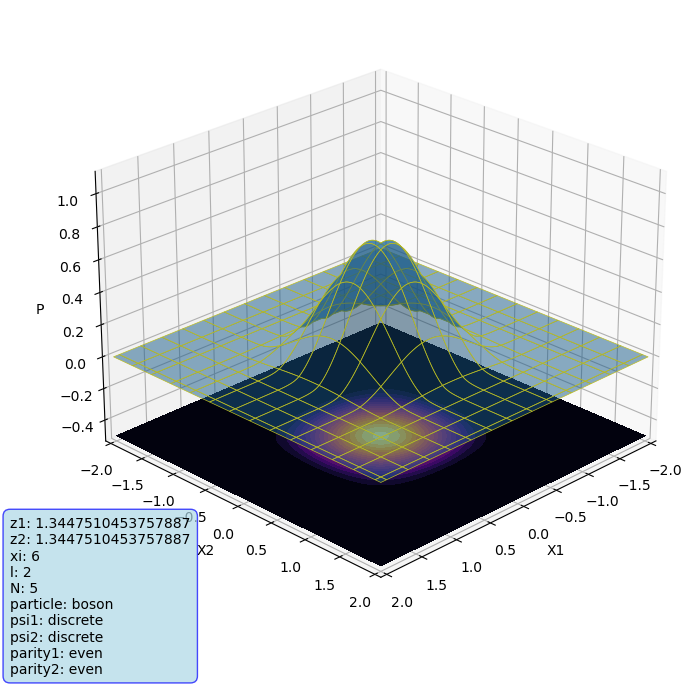

In [134]:
#@title  Bosons both on ground state -- P -- Figure 2 (a)

args_dict = {
    "x1":X1,
    "x2":X2,
    "z1":z_dis_even[0],
    "z2":z_dis_even[0],
    "xi":xi,
    "l":l,
    "N":N,
    "particle":"boson",
    "psi1":"discrete",
    "psi2":"discrete",
    "parity1":"even",
    "parity2":"even"
}

Z = P12M(**args_dict)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


#surf = ax.plot_surface(X1, X2, Z, cmap='summer',linewidth=0, antialiased=False)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=3, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

# Format the args_dict into a readable string
text_str = '\n'.join([f"{key}: {value}" for key, value in list(args_dict.items())[2:]])
plt.figtext(0.15, 0.05, text_str, fontsize=10, color='black',  # Change text color
            bbox=dict(facecolor='lightblue', edgecolor='blue', boxstyle="round,pad=0.5", alpha=0.7))

ax.view_init(elev=25, azim=45);
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

(-2.0, 2.0)

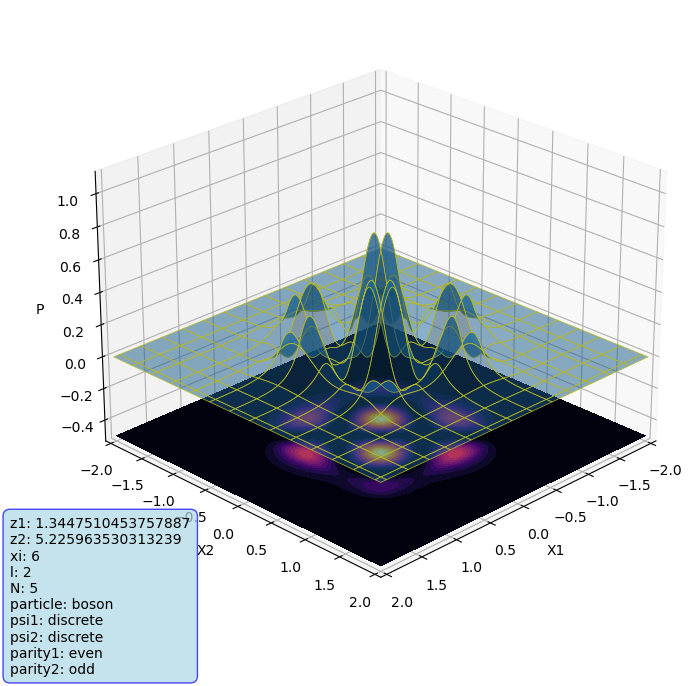

In [135]:
#@title  Bosons, one on ground state other exited (both discrete) -- P -- Figure 2 (b)

args_dict = {
    "x1":X1,
    "x2":X2,
    "z1":z_dis_even[0],
    "z2":z_dis_odd[1],
    "xi":xi,
    "l":l,
    "N":N,
    "particle":"boson",
    "psi1":"discrete",
    "psi2":"discrete",
    "parity1":"even",
    "parity2":"odd"
}

Z = normalized_P12M(**args_dict)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


#surf = ax.plot_surface(X1, X2, Z, cmap='summer',linewidth=0, antialiased=False)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=3, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

# Format the args_dict into a readable string
text_str = '\n'.join([f"{key}: {value}" for key, value in list(args_dict.items())[2:]])
plt.figtext(0.15, 0.05, text_str, fontsize=10, color='black',  # Change text color
            bbox=dict(facecolor='lightblue', edgecolor='blue', boxstyle="round,pad=0.5", alpha=0.7))

ax.view_init(elev=25, azim=45);
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

(-2.0, 2.0)

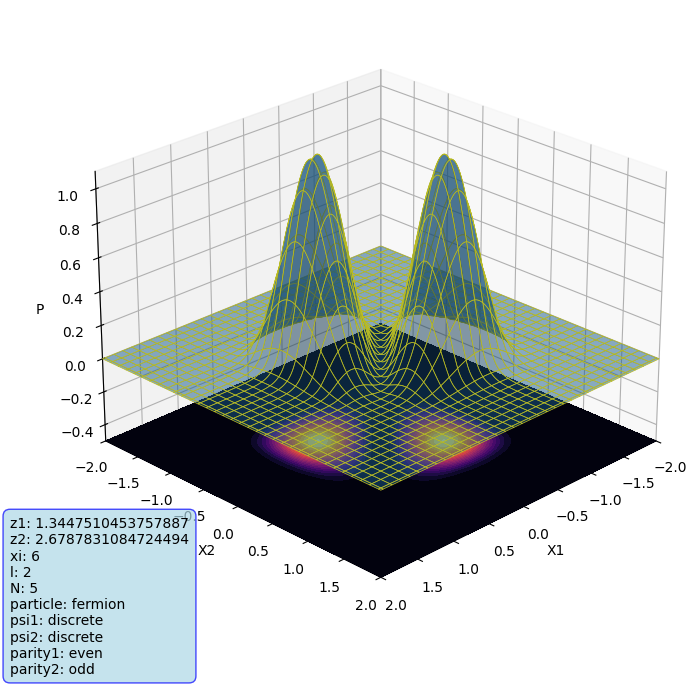

In [ ]:
#@title  Fermions, one on ground state other exited (both discrete) -- P -- Figure 3 (a)

args_dict = {
    "x1":X1,
    "x2":X2,
    "z1":z_dis_even[0],
    "z2":z_dis_odd[0],
    "xi":xi,
    "l":l,
    "N":N,
    "particle":"fermion",
    "psi1":"discrete",
    "psi2":"discrete",
    "parity1":"even",
    "parity2":"odd"
}

Z = normalized_P12M(**args_dict)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

# Format the args_dict into a readable string
text_str = '\n'.join([f"{key}: {value}" for key, value in list(args_dict.items())[2:]])
plt.figtext(0.15, 0.05, text_str, fontsize=10, color='black',  # Change text color
            bbox=dict(facecolor='lightblue', edgecolor='blue', boxstyle="round,pad=0.5", alpha=0.7))

ax.view_init(elev=25, azim=45);
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

(-2.0, 2.0)

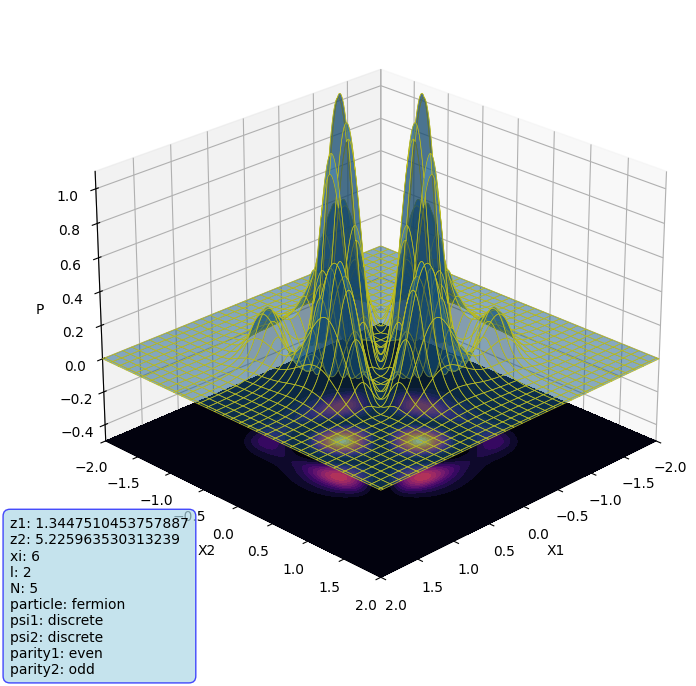

In [ ]:
#@title  Fermions, one on ground state other exited (both discrete) -- P -- Figure 3 (b)

args_dict = {
    "x1":X1,
    "x2":X2,
    "z1":z_dis_even[0],
    "z2":z_dis_odd[1],
    "xi":xi,
    "l":l,
    "N":N,
    "particle":"fermion",
    "psi1":"discrete",
    "psi2":"discrete",
    "parity1":"even",
    "parity2":"odd"
}

Z = normalized_P12M(**args_dict)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


#surf = ax.plot_surface(X1, X2, Z, cmap='summer',linewidth=0, antialiased=False)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=3, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

# Format the args_dict into a readable string
text_str = '\n'.join([f"{key}: {value}" for key, value in list(args_dict.items())[2:]])
plt.figtext(0.15, 0.05, text_str, fontsize=10, color='black',  # Change text color
            bbox=dict(facecolor='lightblue', edgecolor='blue', boxstyle="round,pad=0.5", alpha=0.7))

ax.view_init(elev=25, azim=45);
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

<font size=5 color='#13DAE2'>
Probabilidad térmica
</font>
<br>

Ahora graficamos teniendo en cuenta una temperatura no nula haciendo uso de la siguiente expresión.

$$
Pth = \frac{\sum_{disc} \sum_{disc} P_{z_1,z_2}(x_1,x_2) e^{-E_{z_1,z_2}/kT} + \sum_{cont} \sum_{cont} P_{z_1,z_2}(x_1,x_2) e^{-E_{z_1,z_2}/kT} + \sum_{disc} \sum_{cont} P_{z_1,z_2}(x_1,x_2) e^{-E_{z_1,z_2}/kT}}{\sum_{disc} \sum_{disc} e^{-E_{z_1,z_2}/kT} + \sum_{cont} \sum_{cont} e^{-E_{z_1,z_2}/kT} + \sum_{disc} \sum_{cont} e^{-E_{z_1,z_2}/kT}}  
$$

In [ ]:
def joint_thermal_proability(x1, x2, z_disc, z_cont, xi, l, N, particle, t):
    """
    Calculates the joint thermal probability for a system of two particles with one particle,
    considering both bosonic and fermionic statistics.
    
    The probability is computed by summing over the possible particle states (discrete, continuum, and mixed),
    weighted by the Boltzmann factor corresponding to the thermal distribution at temperature `t`.
    
    The function also calculates the partition function as a normalization factor for the probability.
    
    Parameters:
    x1 (float or np.ndarray): Position(s) of the first particle.
    x2 (float or np.ndarray): Position(s) of the second particle.
    z_disc (np.ndarray): Array of discrete particle states (energy values).
    z_cont (np.ndarray): Array of continuum particle states (energy values).
    xi (float): Parameter related to the particle's characteristics.
    l (float): Width of the big well
    N (int): The size of the big well is N*L
    particle (str): Type of particle, either 'boson' or 'fermion'.
    t (float): Temperature (used for Boltzmann factor calculation).
    
    Returns:
    float: The joint thermal probability for the system of two particles.
    """
    
    # Start with discrete states
    partition_func = 0
    Pz1z2 = 0
    disc_parity = ["even","odd"]*int(np.ceil(z_disc.shape[0]/2))
    for i, (z1, parity1) in enumerate(zip(z_disc, disc_parity)):
        for z2, parity2 in zip(z_disc[i:], disc_parity[i:]):
            
            # Exclude cases where particles are fermions and in the same state
            if (particle == "fermion") and (z1 == z2):
                continue
            else:
                # Compute the thermal probability for the discrete state
                Pz1z2 += normalized_P12M(x1, x2, z1, z2, xi, l, N, particle, "discrete", "discrete", parity1, parity2) * np.exp(-2 * (xi**2 - z1**2) / t)
                partition_func += np.exp(-2 * (xi**2 - z1**2) / t)
    
    # Sum for continuum states
    cont_parity = ["even","odd"]*int(np.ceil(z_cont.shape[0]/2))
    for i, (z1, parity1) in enumerate(zip(z_disc, cont_parity)):
        for z2, parity2 in zip(z_disc[i:], cont_parity[i:]):
            
            # Exclude cases where particles are fermions and in the same state
            if (particle == "fermion") and (z1 == z2):
                pass
            else:
                # Compute the thermal probability for the continuum state
                Pz1z2 += normalized_P12M(x1, x2, z1, z2, xi, l, N, particle, "continuum", "continuum", parity1, parity2) * np.exp(-2 * z2**2 / t)
                partition_func += np.exp(-2 * z2**2 / t)
    
    # Sum for mixed case (one particle discrete, the other continuum)
    for i, (z1, parity1) in enumerate(zip(z_disc, disc_parity)):
        for z2, parity2 in zip(z_cont, cont_parity):
        
            # Compute the thermal probability for the mixed state
            Pz1z2 += normalized_P12M(x1, x2, z1, z2, xi, l, N, particle, "discrete", "continuum", parity1, parity2) * np.exp(-(xi**2 - z1**2 + z2**2) / t)
            partition_func += np.exp(-(xi**2 - z1**2 + z2**2) / t)
    
    # Normalize the probability
    total = Pz1z2 / partition_func
    
    return total
    

In [ ]:
# Compute and sort discretes z
Es_dis_eve, z_dis_even = energies_even(xi)
Es_dis_odd, z_dis_odd = energies_odd(xi)

z_disc = np.sort(np.concatenate((z_dis_even, z_dis_odd)))


# Compute and sort continuum z
Es_cont_even, z_cont_even = energies_even_cont(xi,N,10)
Es_cont_odd, z_cont_odd = energies_odd_cont(xi,N,10)

z_cont = np.sort(np.concatenate((z_cont_even,z_cont_odd)))


# Define intervals for plotting

x1 = np.linspace(-4,4,500)
x2 = np.linspace(-4,4,500)
X1,X2 = np.meshgrid(x1,x2)

# Define parameters
context = {
    "x1":X1,
    "x2":X2,
    "z_disc": z_disc,
    "z_cont":z_cont,
    "xi":xi,
    "l":2,
    "N":5,
    "particle":"boson",
    "t":1
}


In [ ]:
Z = joint_thermal_proability(**context)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)



ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

# Format the args_dict into a readable string
text_str = '\n'.join([f"{key}: {value}" for key, value in list(args_dict.items())[2:]])
plt.figtext(0.15, 0.05, text_str, fontsize=10, color='black',  # Change text color
            bbox=dict(facecolor='lightblue', edgecolor='blue', boxstyle="round,pad=0.5", alpha=0.7))

ax.view_init(elev=25, azim=45);
#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)